**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Carlos Alejandro Herrera Legaspi, MATRÍCULA: A01751709
*   NOMBRE: Hesus García Cobos, MATRÍCULA: A01129778
*   NOMBRE: Rafael Mandujano Núñez, MATRÍCULA: A00824644
*   NOMBRE: Omar Aguilar Macedo, MATRÍCULA: A01797078

In [1]:
import subprocess
import sys
import os


def instalar(paquete):
    """Instala un paquete si no está disponible en el entorno."""
    subprocess.check_call([sys.executable, "-m", "pip", "install", paquete, "--quiet"])

paquetes = {
    "pandas": "pd",
    "numpy": "np",
    "matplotlib.pyplot": "plt",
    "seaborn": "sns",
    "scipy.stats": "stats",
    "sklearn.preprocessing": ["PowerTransformer", "MinMaxScaler"],
    "category_encoders": ["BinaryEncoder"]
}

for paquete, alias in paquetes.items():
    try:
        if isinstance(alias, list): 
            exec(f"from {paquete} import {', '.join(alias)}")
        else:  
            exec(f"import {paquete} as {alias}")
    except ImportError:
        instalar(paquete.split(".")[0]) 
        if isinstance(alias, list):
            exec(f"from {paquete} import {', '.join(alias)}")
        else:
            exec(f"import {paquete} as {alias}")
            
            
from sklearn.preprocessing import OneHotEncoder as SkOneHotEncoder

In [2]:
# Set plot styles and configurations
plt.style.use('ggplot')
sns.set(style='whitegrid', palette='tab10')

# Set figure size and layout
plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams['figure.autolayout'] = True

# Plot inline in Jupyter Notebook
%matplotlib inline

# Other useful configurations
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.size'] = 12

In [3]:

file_path = os.path.join('data', 'vehicles.csv')
cars_df = pd.read_csv(file_path)
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
type(cars_df)

pandas.core.frame.DataFrame

In [5]:
metadata_df = pd.DataFrame({
    'column': cars_df.columns,
    'non_null_count': cars_df.notnull().sum(),
    'dtype': cars_df.dtypes
})
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

<div class="alert alert-block alert-info">

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.
</div>

In [6]:
eliminados = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']   
cars_df.drop(columns=eliminados, inplace=True)

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [7]:
registros = cars_df.shape[0]
columnas = cars_df.shape[1] 

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

<div class="alert alert-block alert-info">

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?
</div>

In [8]:
def calcular_faltantes(df):
    faltantes = df.isnull().sum()
    porcentaje_faltantes = df.isnull().mean() * 100
    resultado = pd.DataFrame({
        'variable': df.columns,
        'cantidad_faltantes': faltantes,
        'missing_pct': porcentaje_faltantes
    })
    return resultado

faltantes_df = calcular_faltantes(cars_df)
display(faltantes_df)

registros = cars_df.shape[0]
setenta_porciento = int(registros * 0.70)
cars_df.dropna(thresh=setenta_porciento, axis=1, inplace=True)

cars_df.info()

,variable,cantidad_faltantes,missing_pct
region,region,0,0.000000
region_url,region_url,0,0.000000
price,price,0,0.000000
year,year,1205,0.282281
manufacturer,manufacturer,17646,4.133714
model,model,5277,1.236179
condition,condition,174104,40.785232
cylinders,cylinders,177678,41.622470
fuel,fuel,3013,0.705819
odometer,odometer,4400,1.030735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


In [9]:
columnas_originales = 26  
columnas_actuales = cars_df.shape[1]  
columnas_eliminadas = columnas_originales - columnas_actuales

print(f"Columnas eliminadas: {columnas_eliminadas}")

Columnas eliminadas: 14


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

<div class="alert alert-block alert-info">

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?

</div>

In [10]:
columnas_a_limpiar = faltantes_df['variable'][faltantes_df['missing_pct'] < 5]  
cars_df.dropna(subset=columnas_a_limpiar.tolist(), inplace=True)
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          306976 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 38.6+ MB


In [11]:
registros_antes = 426880  
registros_despues = cars_df.shape[0]
registros_eliminados = registros_antes - registros_despues

porcentaje_eliminados = (registros_eliminados / registros_antes) * 100

print(f"Registros eliminados: {registros_eliminados}")
print(f"Porcentaje de registros eliminados: {porcentaje_eliminados:.2f}%")


Registros eliminados: 37276
Porcentaje de registros eliminados: 8.73%


los registros se redujeron a 389604 de las 426880 que habia

<div class="alert alert-block alert-info">

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

</div>

In [12]:
# Verificar si hay valores faltantes
if cars_df.isnull().any().any():
    # Inicializar listas para cada tipo de columna
    num_cols = []
    cat_cols = []
    bool_cols = []

    # Clasificar columnas según su tipo
    for col in cars_df.columns:
        if cars_df[col].dtype == 'object':
            cat_cols.append(col)
        elif cars_df[col].dtype == 'bool':
            bool_cols.append(col)
        else:
            num_cols.append(col)

    # Imprimir columnas con valores faltantes
    print("Columnas con valores faltantes:")
    print(cars_df.isnull().sum()[cars_df.isnull().sum() > 0])

    # Imputar valores faltantes en columnas numéricas con la mediana
    cars_df[num_cols] = cars_df[num_cols].fillna(cars_df[num_cols].median())

    # Imputar valores faltantes en columnas categóricas con la moda
    cars_df[cat_cols] = cars_df[cat_cols].fillna(cars_df[cat_cols].mode().iloc[0])

    # Imputar valores faltantes en columnas booleanas con la media
    cars_df[bool_cols] = cars_df[bool_cols].fillna(cars_df[bool_cols].mean())

    # Verificar nuevamente si quedan valores faltantes
    print("Columnas con valores faltantes después de la imputación:")
    print(cars_df.isnull().sum()[cars_df.isnull().sum() > 0])
else:
    print("No hay valores faltantes en el dataframe.")


Columnas con valores faltantes:
type    82628
dtype: int64
Columnas con valores faltantes después de la imputación:
Series([], dtype: int64)


In [13]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          389604 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 38.6+ MB


## Valores atípicos

<div class="alert alert-block alert-info">

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

</div>

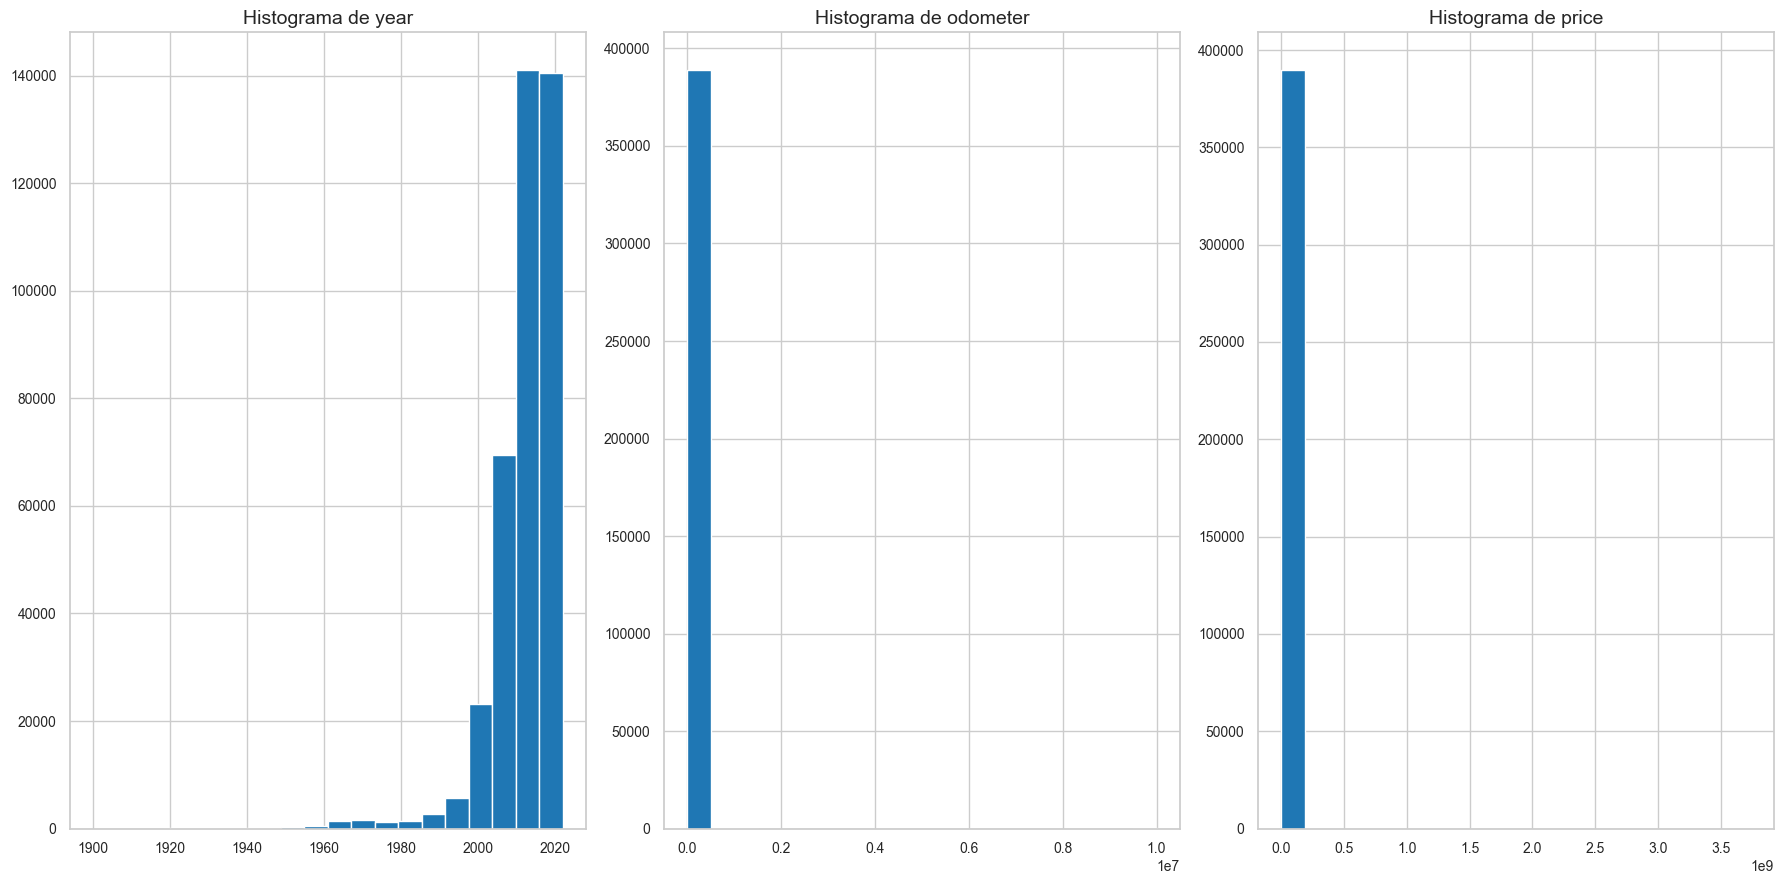

In [14]:
def calcular_bins_sturges(n):
    """Calcula el número de bins usando la regla de Sturges."""
    return int(np.ceil(1 + np.log2(n)))

# Calcular el número de bins usando la regla de Sturges
n = cars_df.shape[0]
bins_sturges = calcular_bins_sturges(n)

# Generar histogramas con 16 y 9 bins respectivamente
columns = ['year', 'odometer', 'price']

# Histograma con bins calculados por Sturges
fig, axes = plt.subplots(nrows=1, ncols=3)
for i, col in enumerate(columns):
    cars_df[col].hist(bins=bins_sturges, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
plt.show()


<div class="alert alert-block alert-info">


3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

</div>

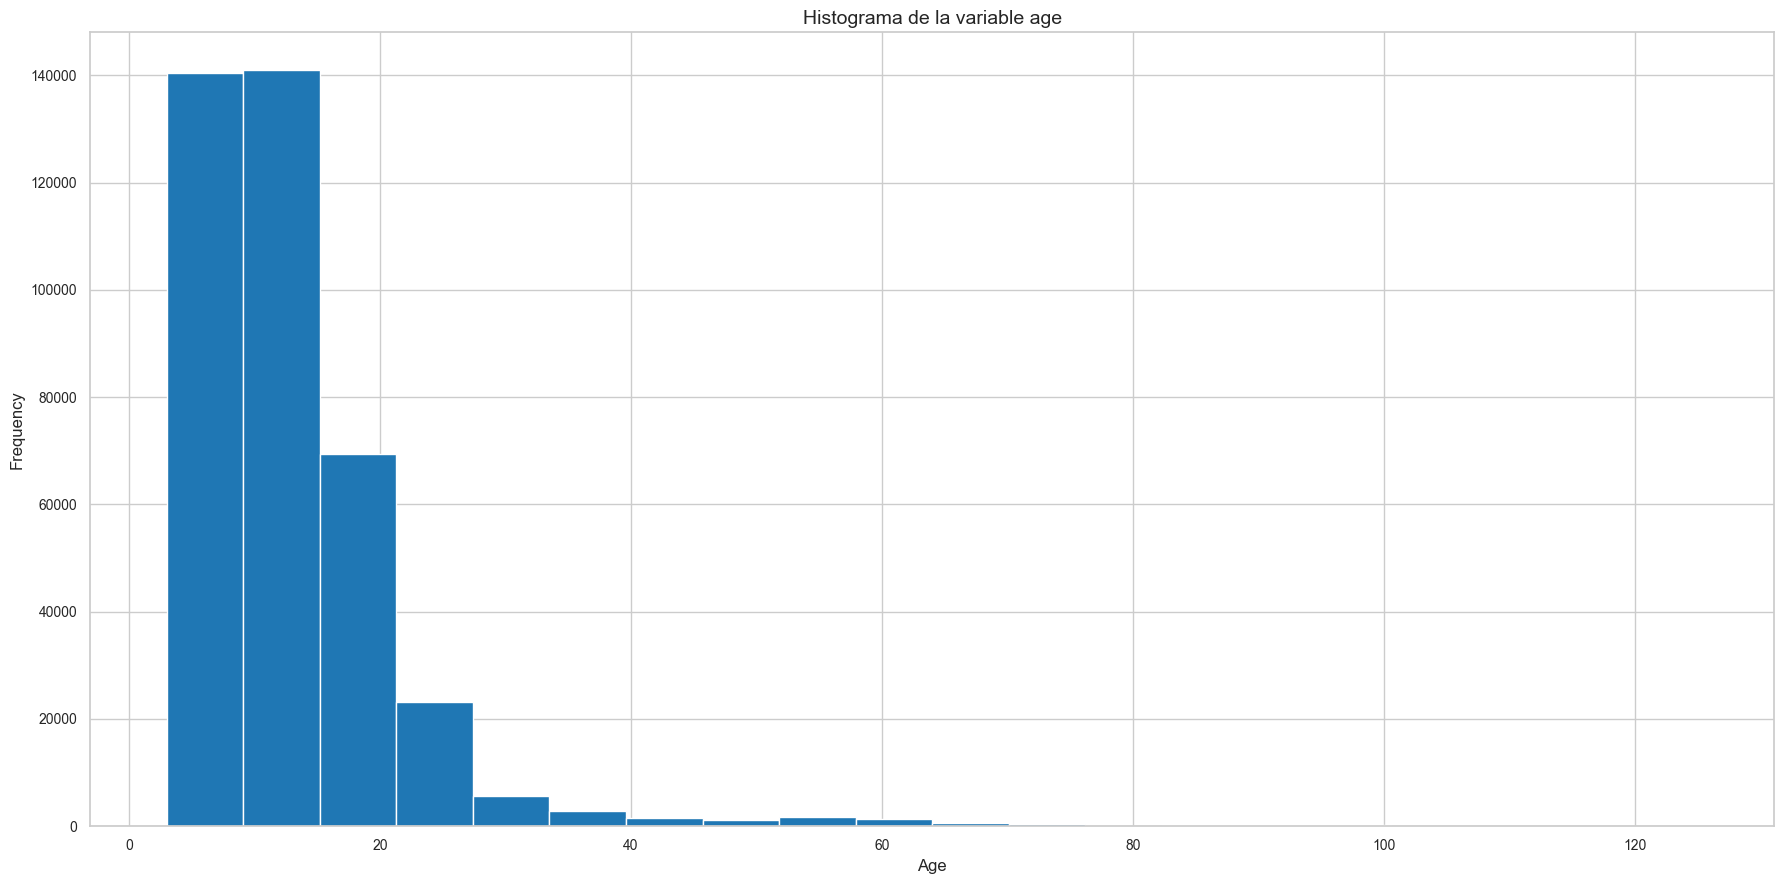

In [15]:
# Calculate the age of the vehicle
current_year = pd.Timestamp.now().year
cars_df['age'] = current_year - cars_df['year']

# Drop the 'year' column
cars_df.drop(columns=['year'], inplace=True)

# Generate the histogram for the 'age' column
cars_df['age'].hist(bins=bins_sturges)
plt.title('Histograma de la variable age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-block alert-info">

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

</div>

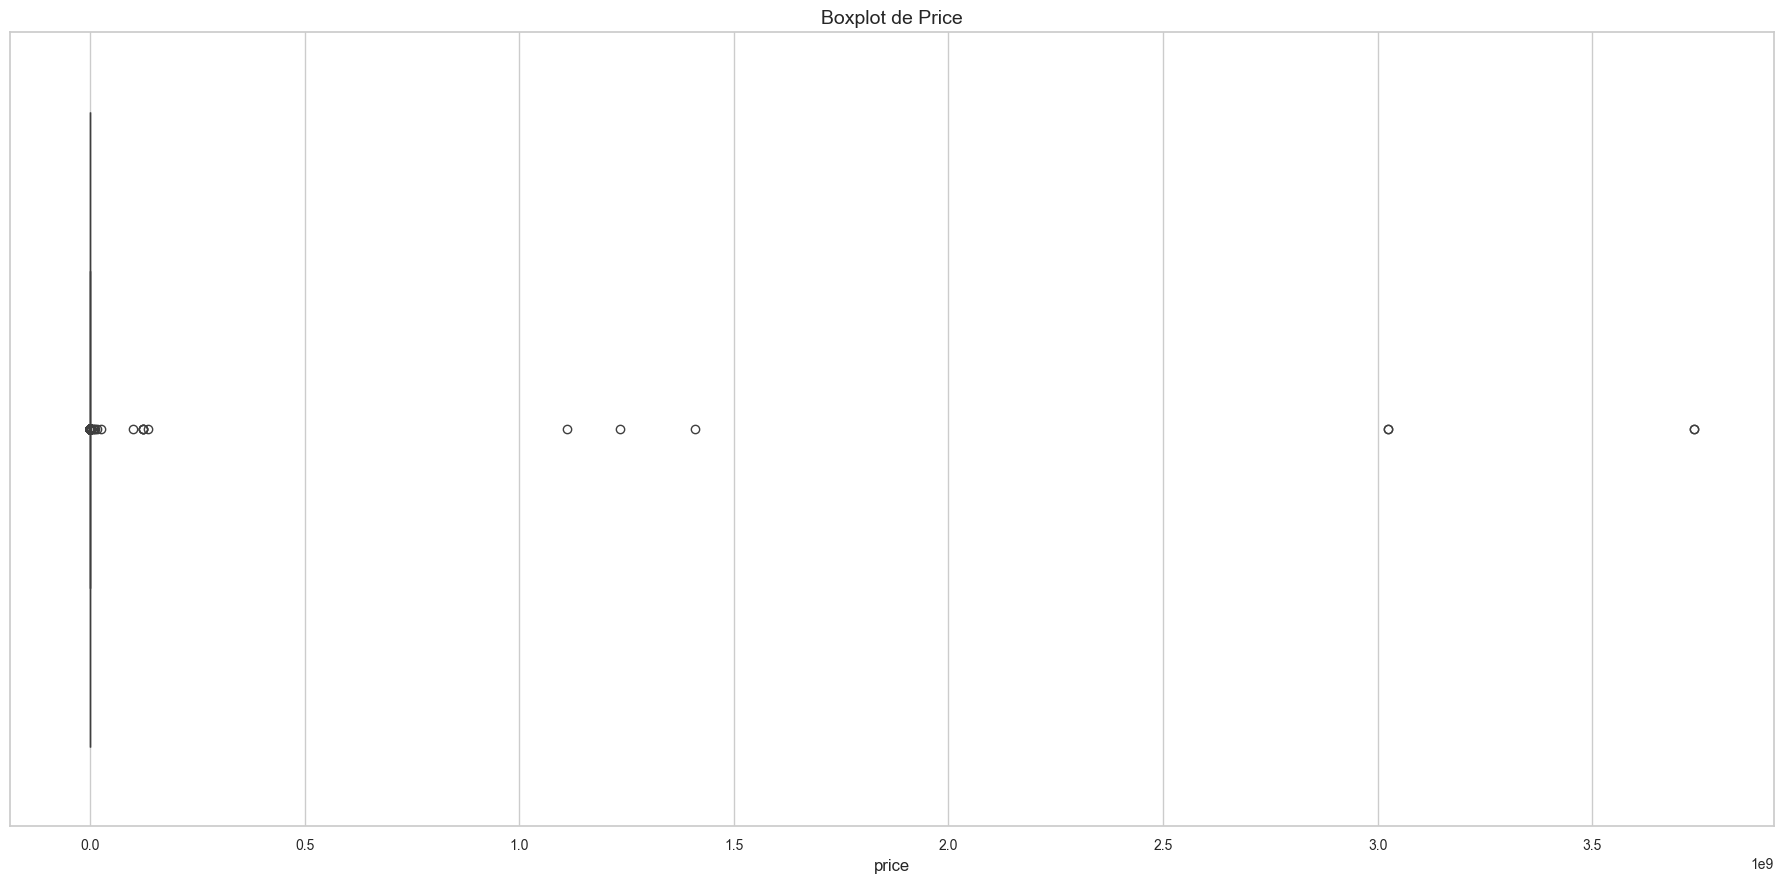

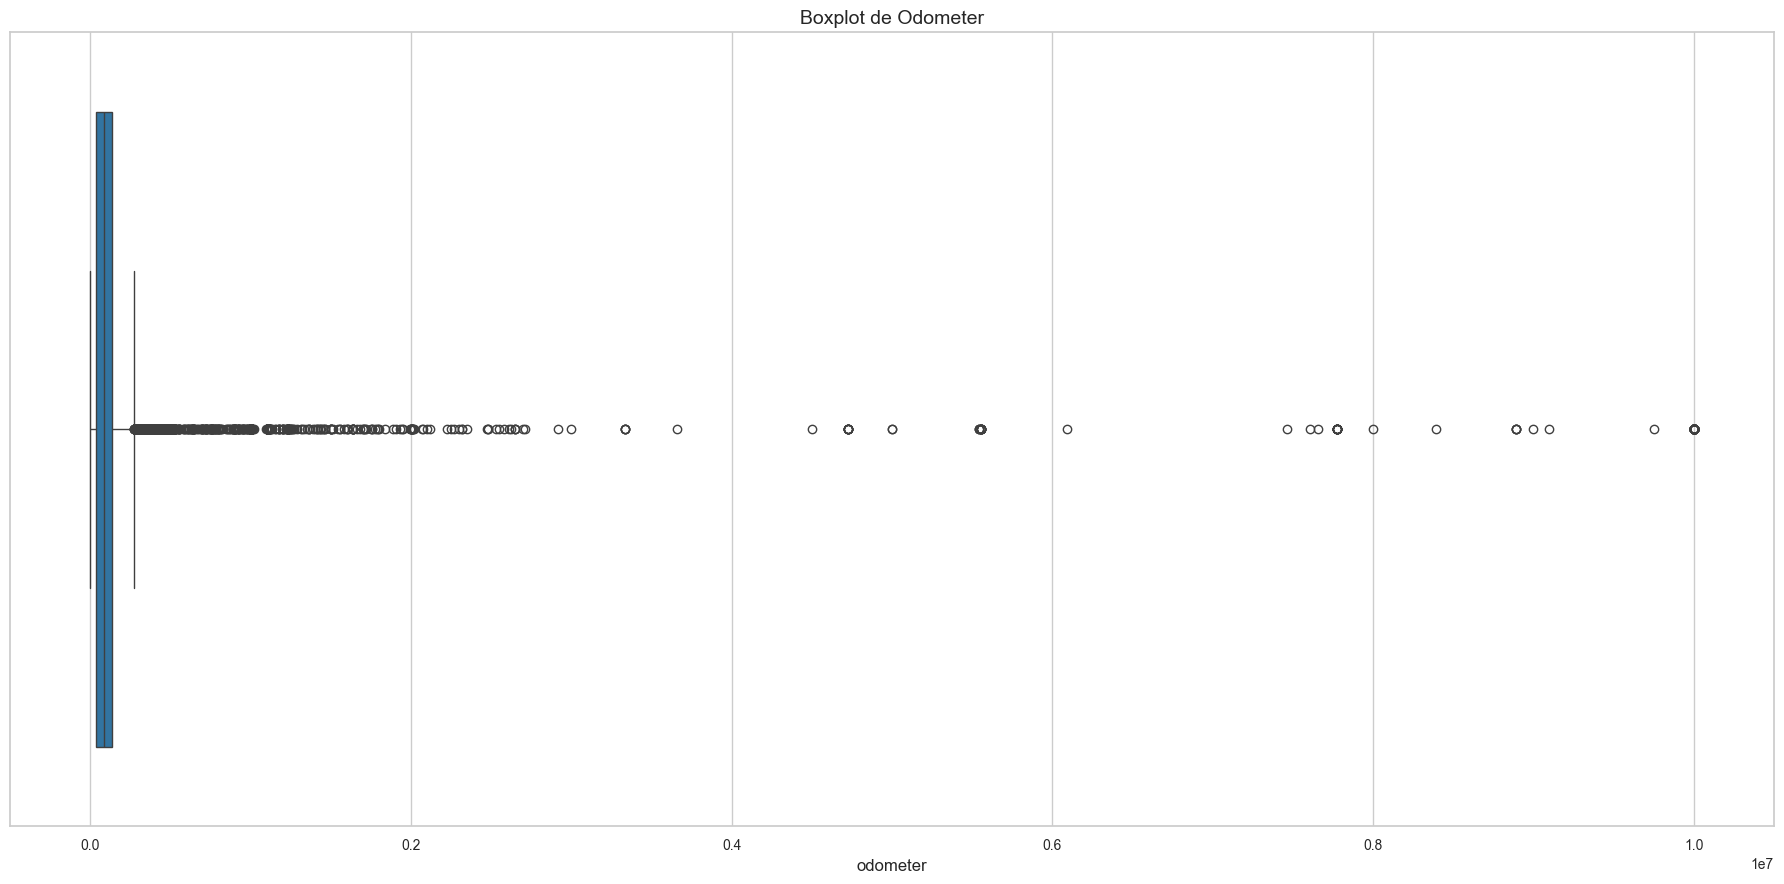

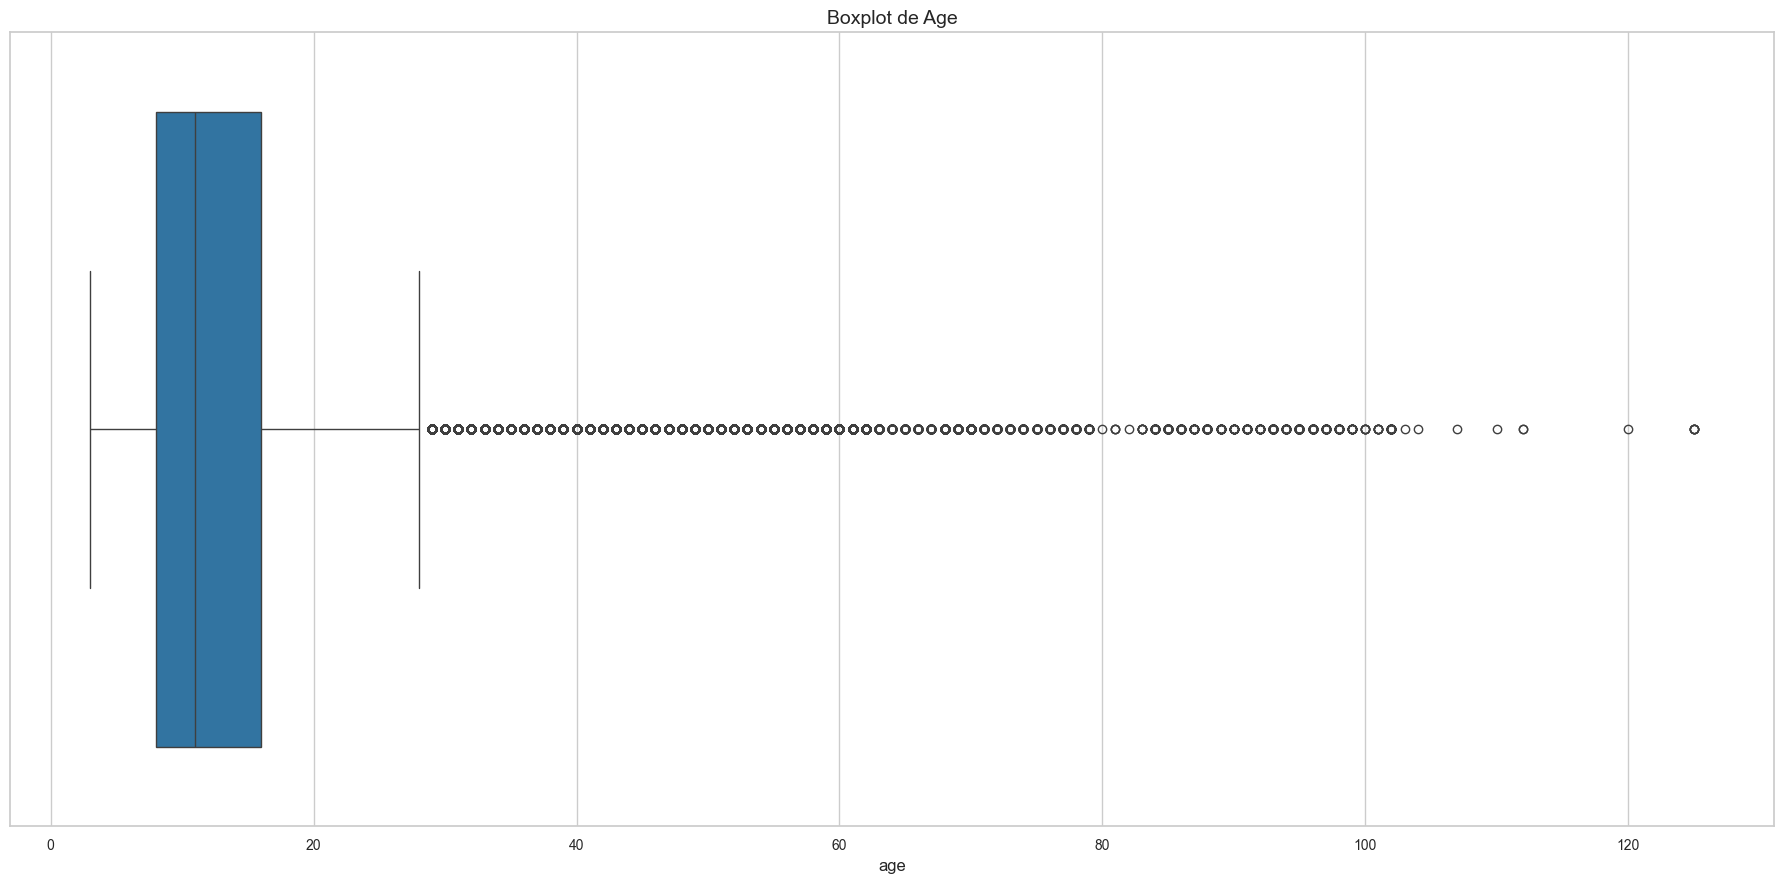

In [16]:
for col in ['price', 'odometer', 'age']:
    sns.boxplot(x=cars_df[col])
    plt.title(f'Boxplot de {col.capitalize()}')
    plt.xlabel(col)
    plt.show()


Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

<div class="alert alert-block alert-info">

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?


</div>

In [17]:
def eliminar_outliers_iqr(df, columnas):
    total_registros = df.shape[0]
    outlier_percentages = {}

    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_percentages[col] = (outliers / total_registros) * 100

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    registros_eliminados = total_registros - df.shape[0]
    porcentaje_eliminados = (registros_eliminados / total_registros) * 100
    total_eliminados = registros_antes - df.shape[0]
    porcentaje_total_eliminados = (total_eliminados / registros_antes) * 100

    return df, outlier_percentages, porcentaje_eliminados, total_eliminados, porcentaje_total_eliminados


columnas_a_evaluar = ["price", "age", "odometer"]
columnas_a_evaluar = [col for col in columnas_a_evaluar if col in cars_df.columns]

cars_df, outlier_percentages, porcentaje_eliminados, total_eliminados, porcentaje_total_eliminados = eliminar_outliers_iqr(cars_df, columnas_a_evaluar)

print("Porcentaje de valores atípicos por variable:")
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct:.2f}%")

print(f"\nPorcentaje total de registros eliminados: {porcentaje_eliminados:.2f}%")
print(f"Total de registros eliminados desde el inicio: {total_eliminados}")
print(f"Porcentaje total de registros eliminados desde el inicio: {porcentaje_total_eliminados:.2f}%")

Porcentaje de valores atípicos por variable:
price: 1.71%
age: 3.02%
odometer: 0.71%

Porcentaje total de registros eliminados: 5.43%
Total de registros eliminados desde el inicio: 58447
Porcentaje total de registros eliminados desde el inicio: 13.69%


<div class="alert alert-block alert-info">

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

</div>

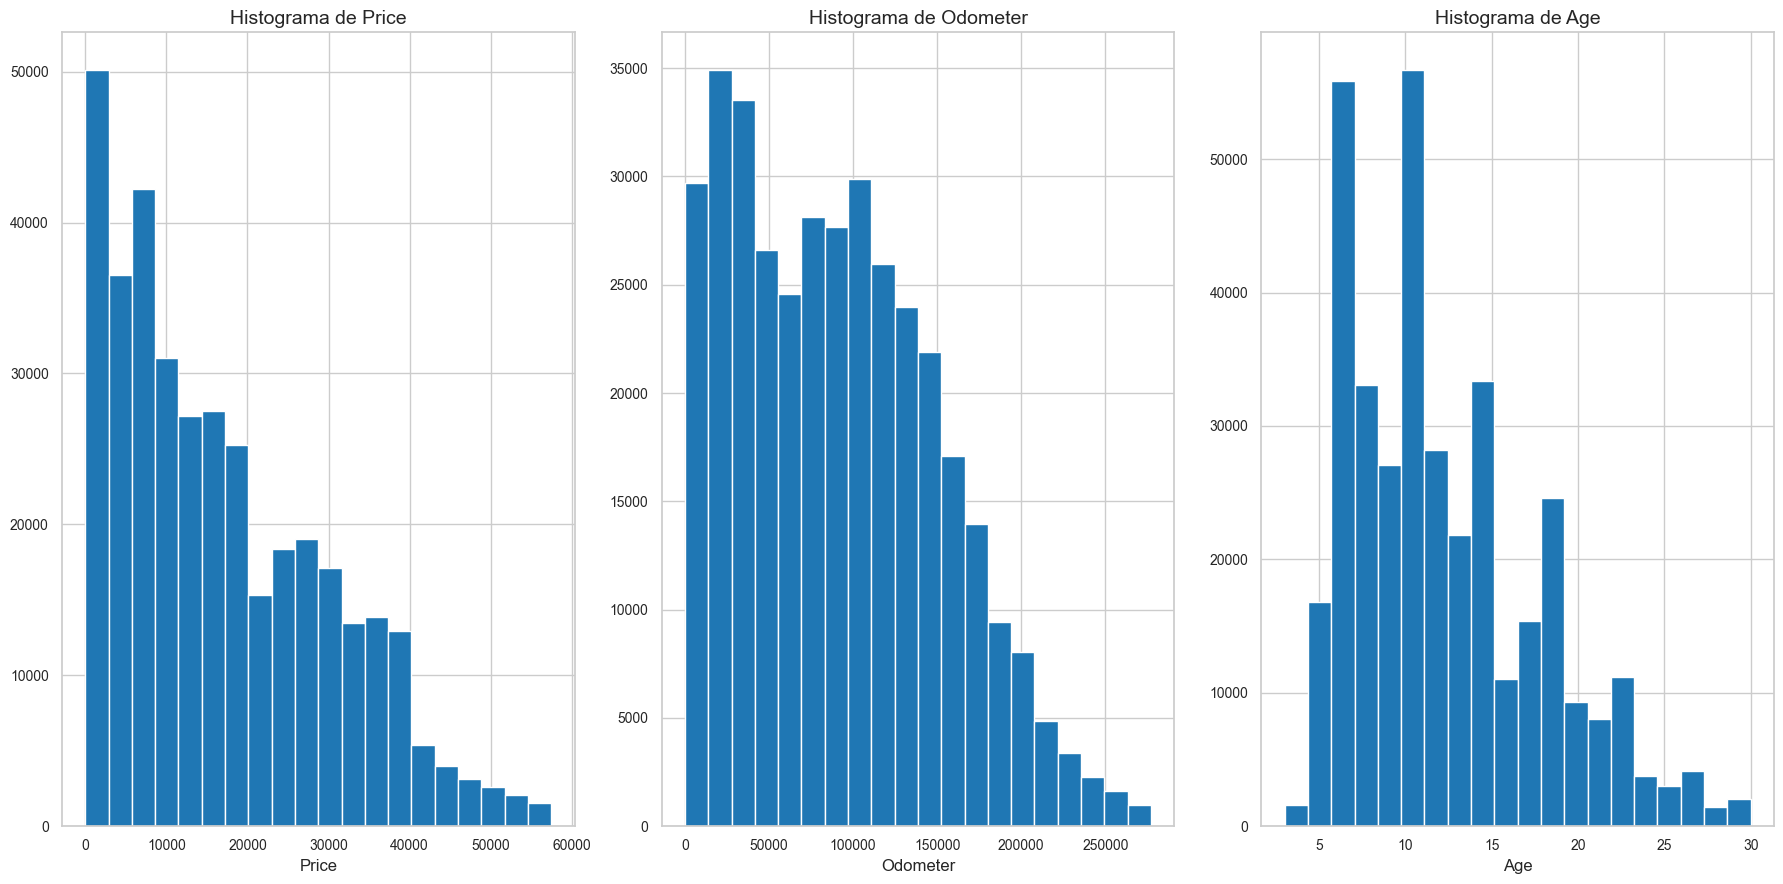

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3)
for i, col in enumerate(['price', 'odometer', 'age']):
    cars_df[col].hist(bins=bins_sturges, ax=axes[i])
    axes[i].set_title(f'Histograma de {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
plt.show()


# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.


<div class="alert alert-block alert-info">

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.
</div>

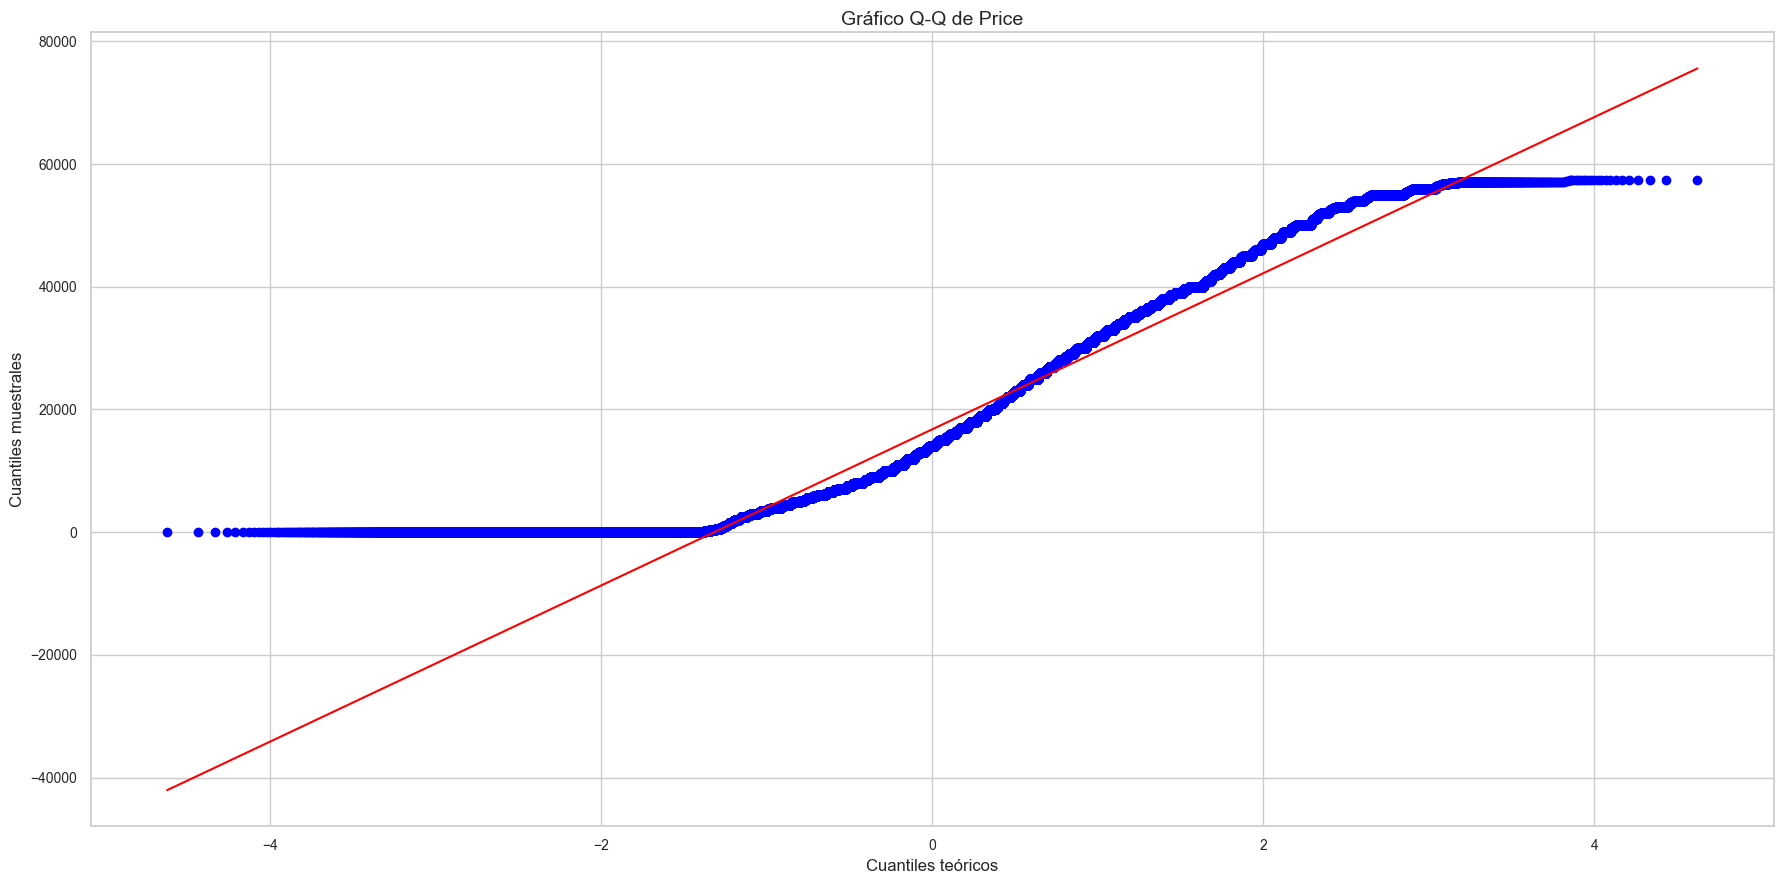

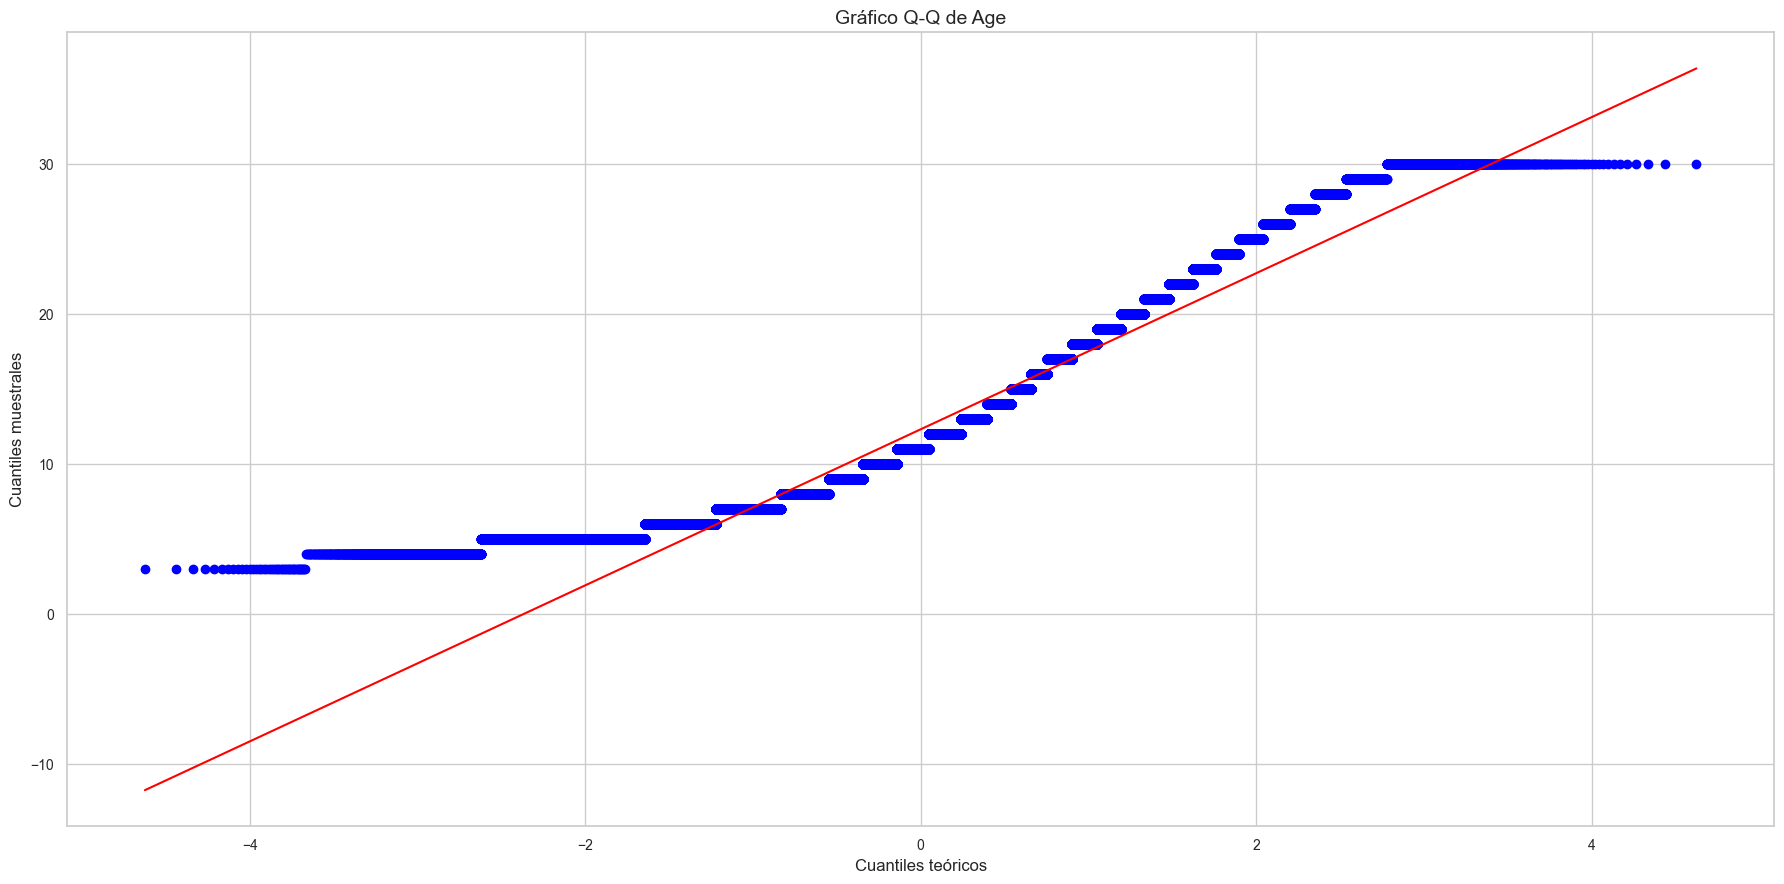

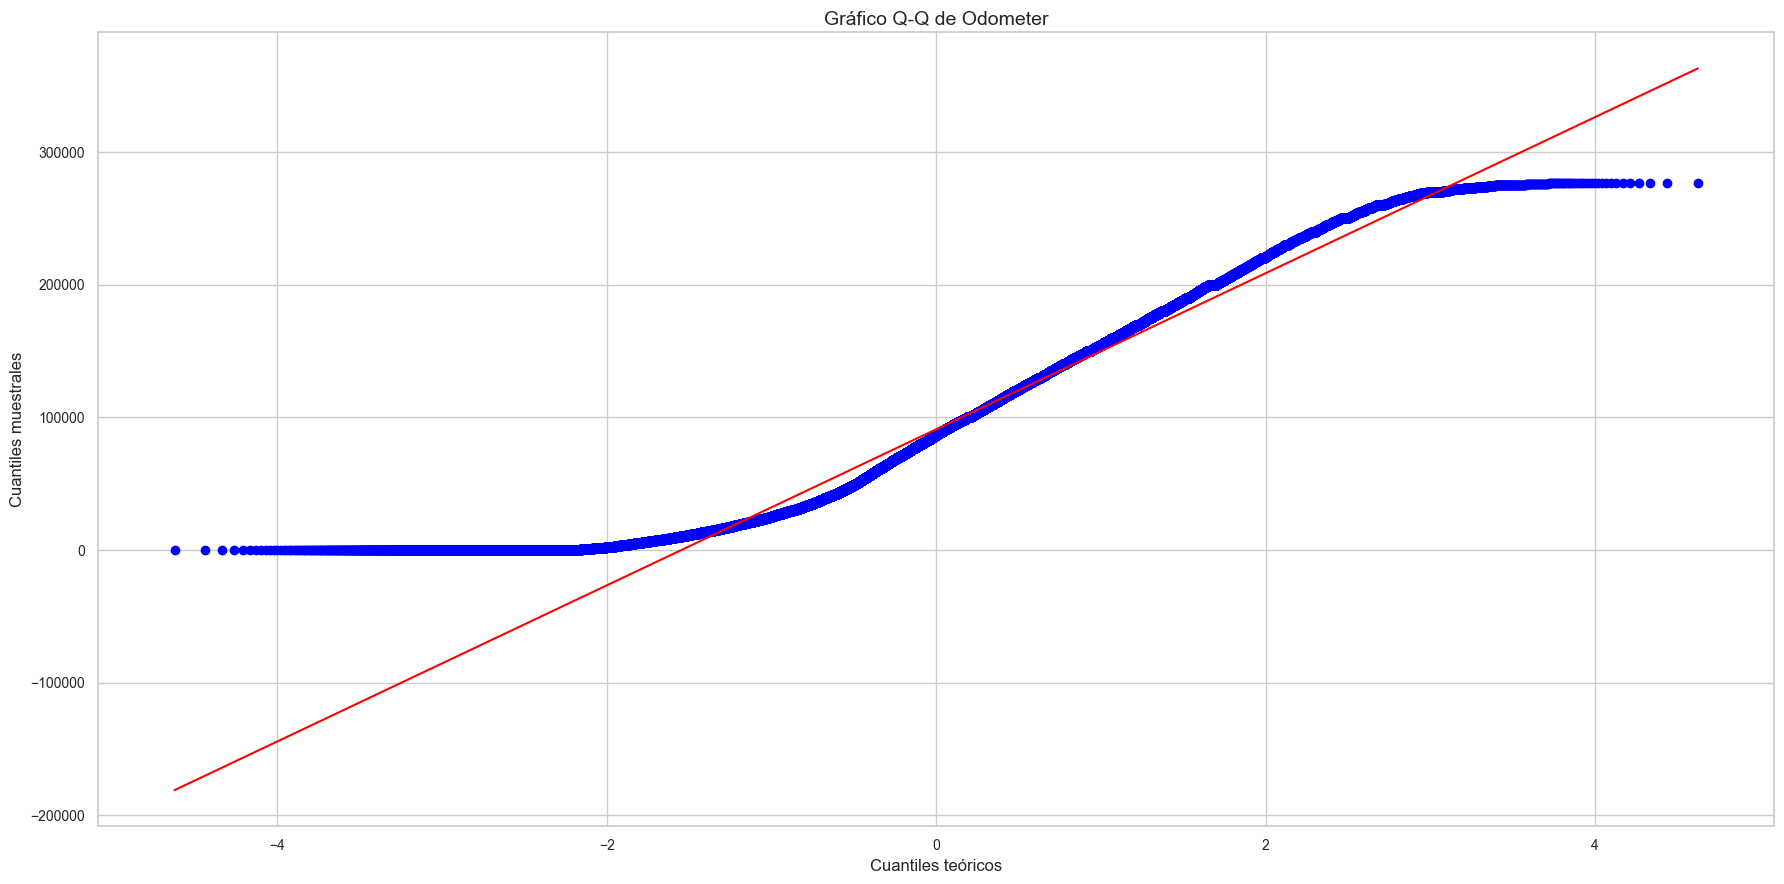

In [19]:
for col in ['price', 'age', 'odometer']:
    stats.probplot(cars_df[col], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {col.capitalize()}')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles muestrales')
    plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

<div class="alert alert-block alert-info">

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas. </div>

In [20]:
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
col_names = cars_df.describe().columns
transf_df = pd.DataFrame(transformer.fit_transform(cars_df[col_names]), columns=col_names)
transf_df

,price,odometer,age
0,193.563980,625.632001,2.236008
1,163.225489,698.226485,2.465187
2,207.706309,347.483442,1.659819
3,186.983245,521.567174,2.001054
4,136.831542,952.940342,2.300347
...,...,...,...
368428,166.295214,458.182655,1.790963
368429,185.942956,271.179380,1.659819
368430,196.986291,154.051753,1.659819
368431,181.701485,441.951156,1.903159


<div class="alert alert-block alert-info">


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

</div>

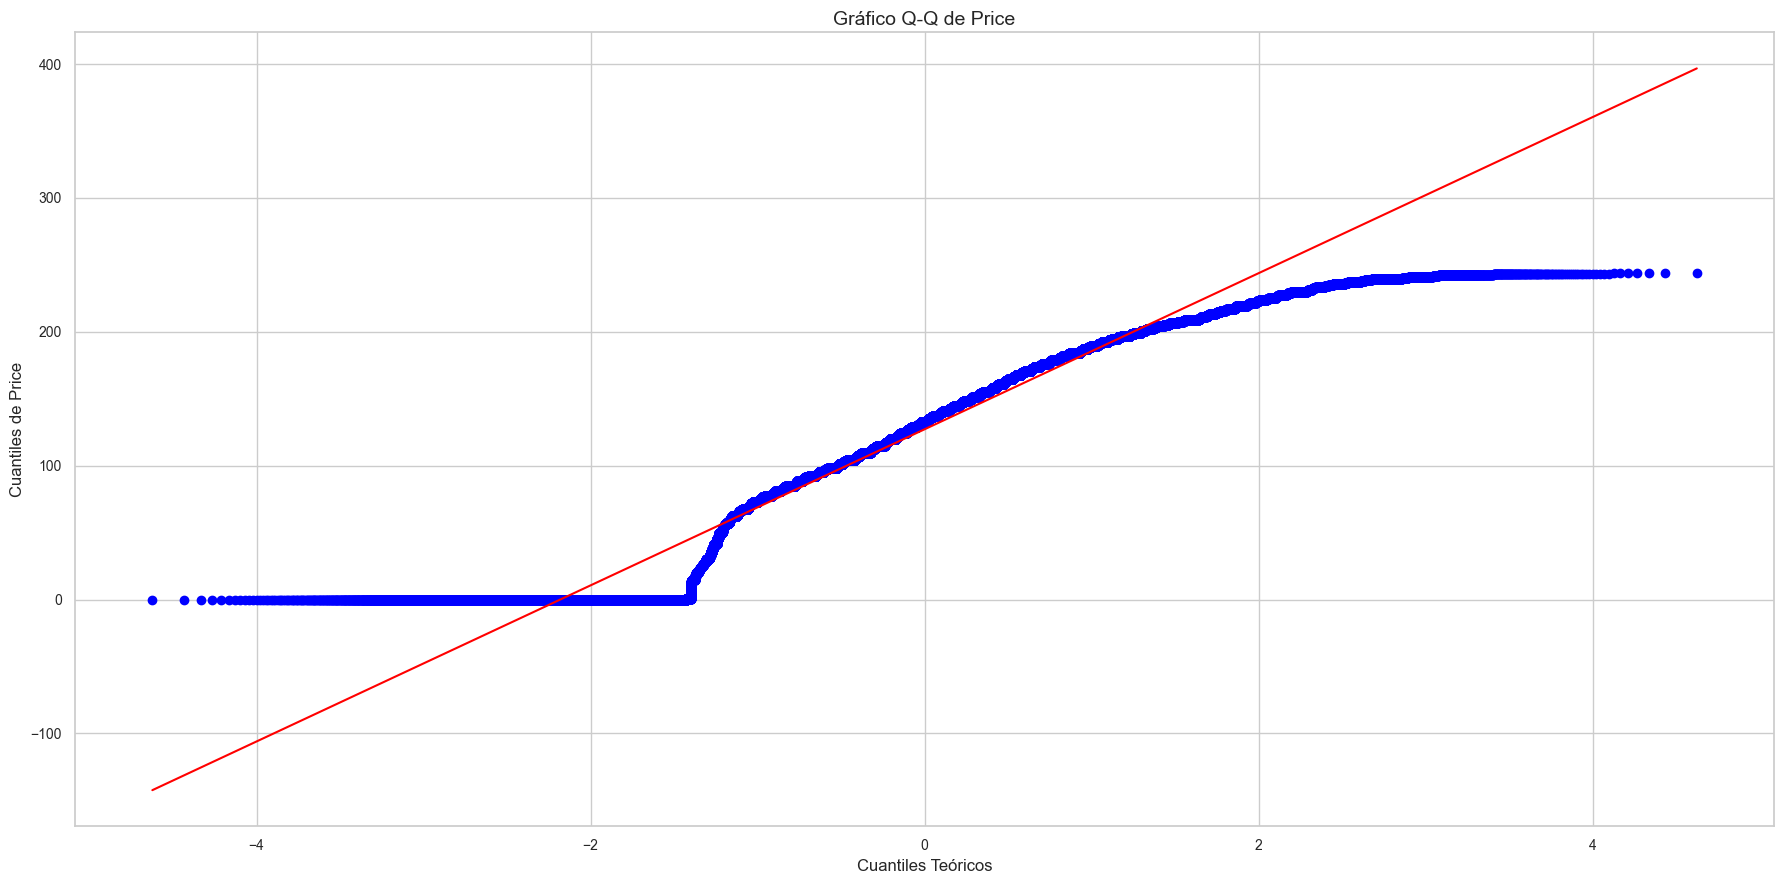

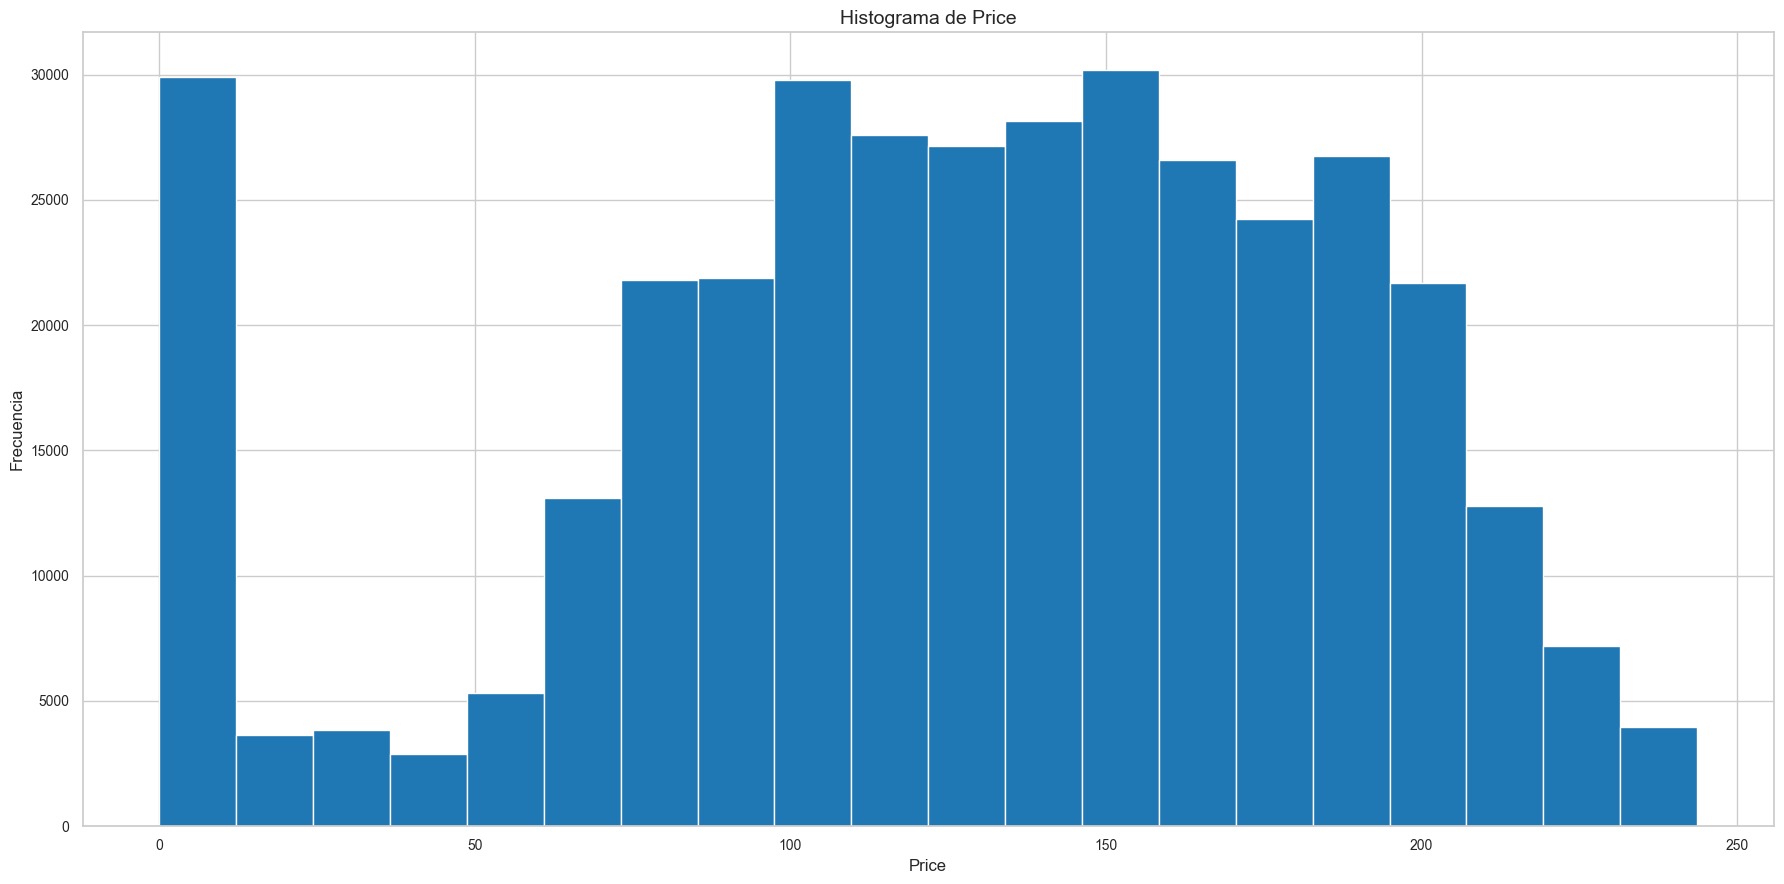

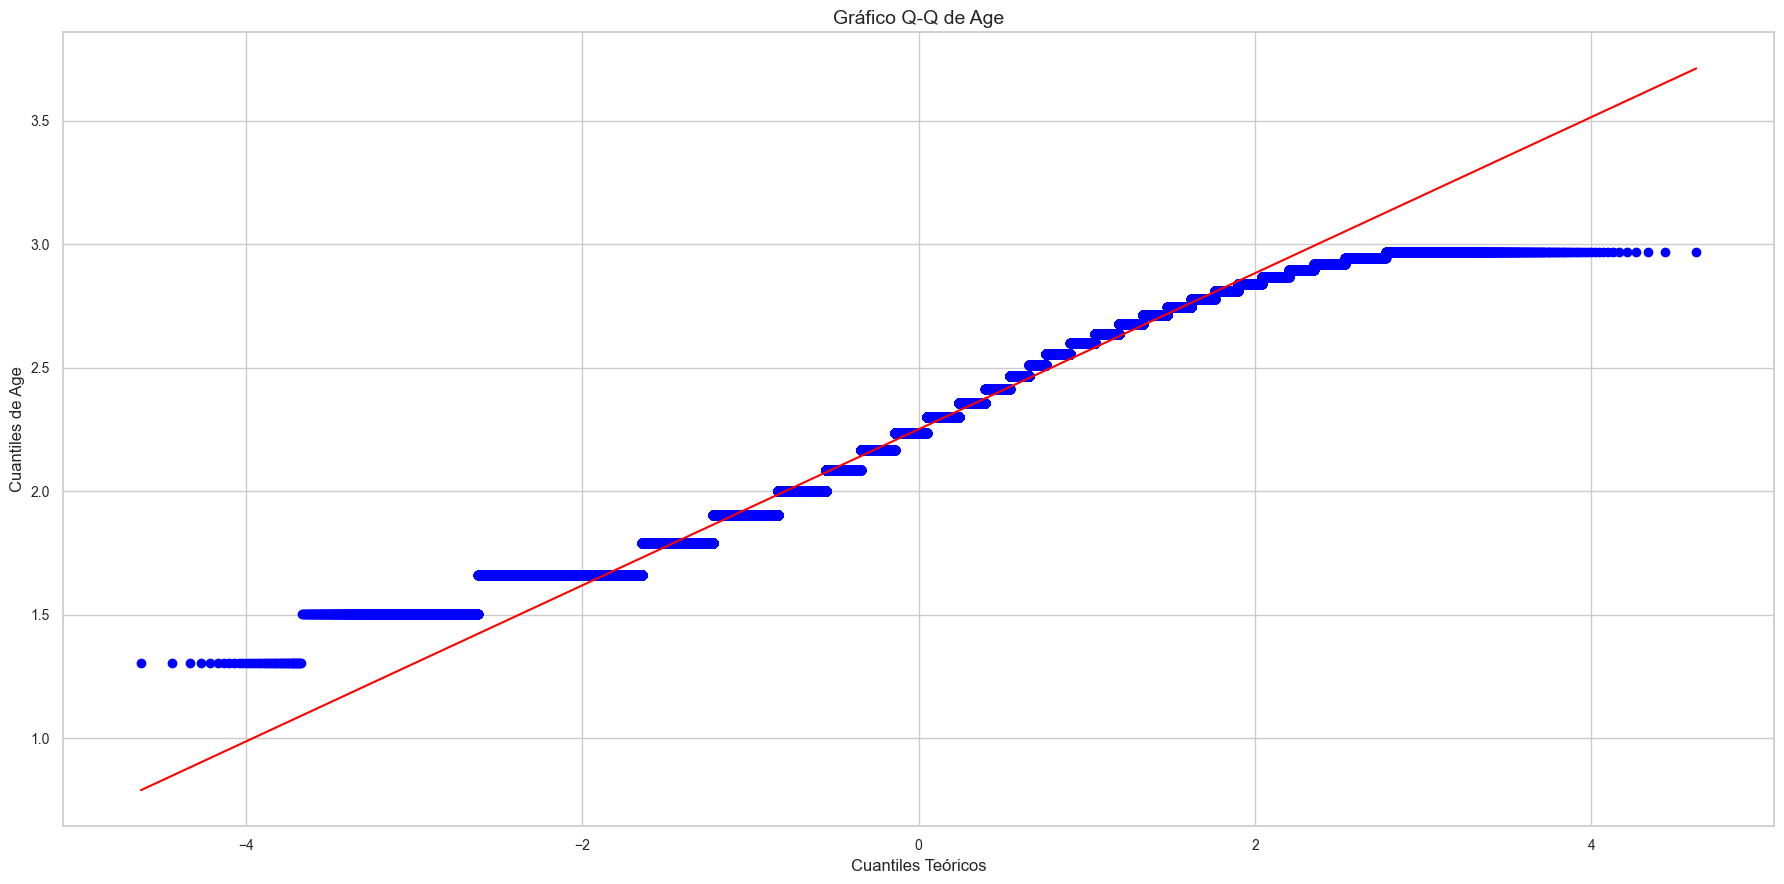

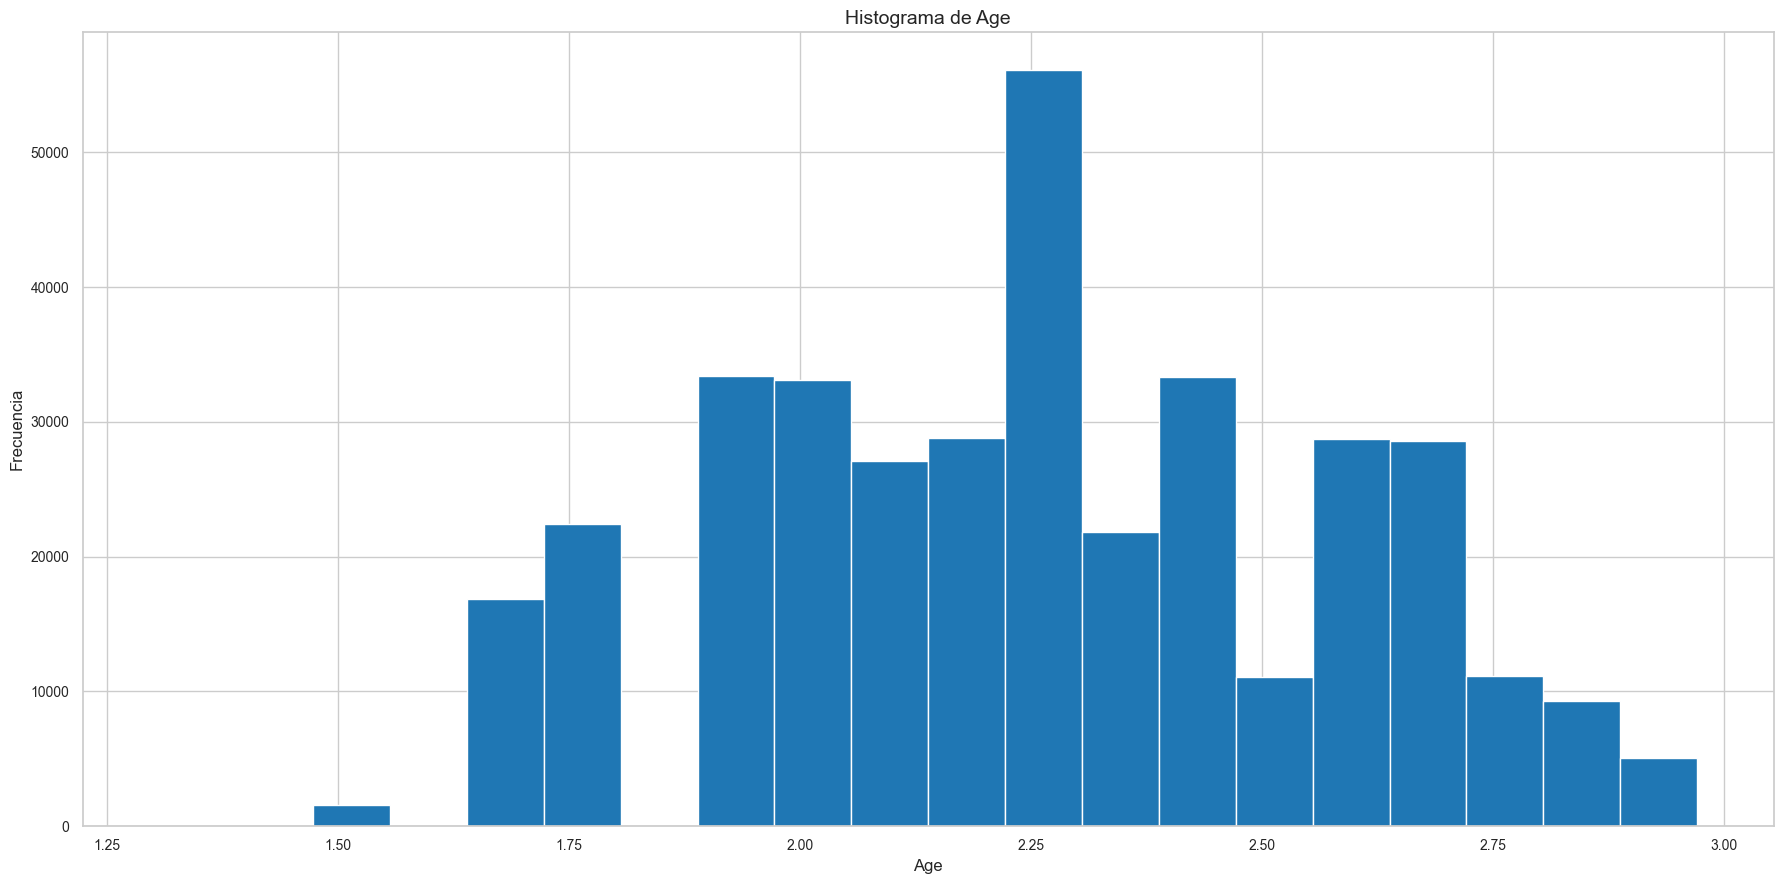

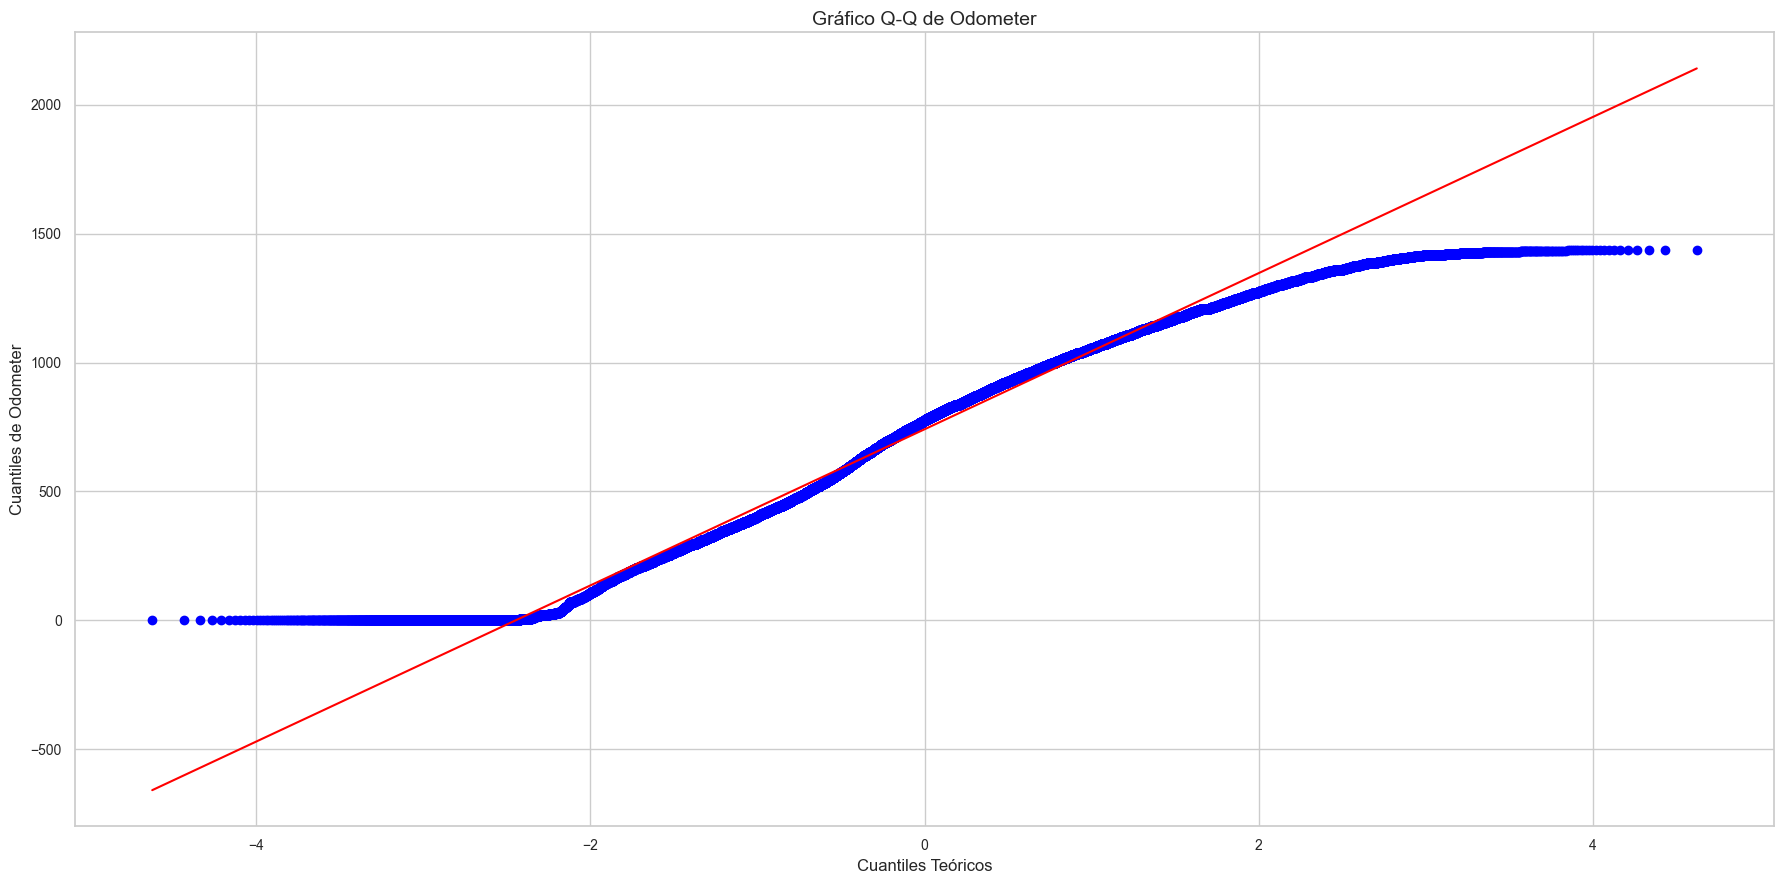

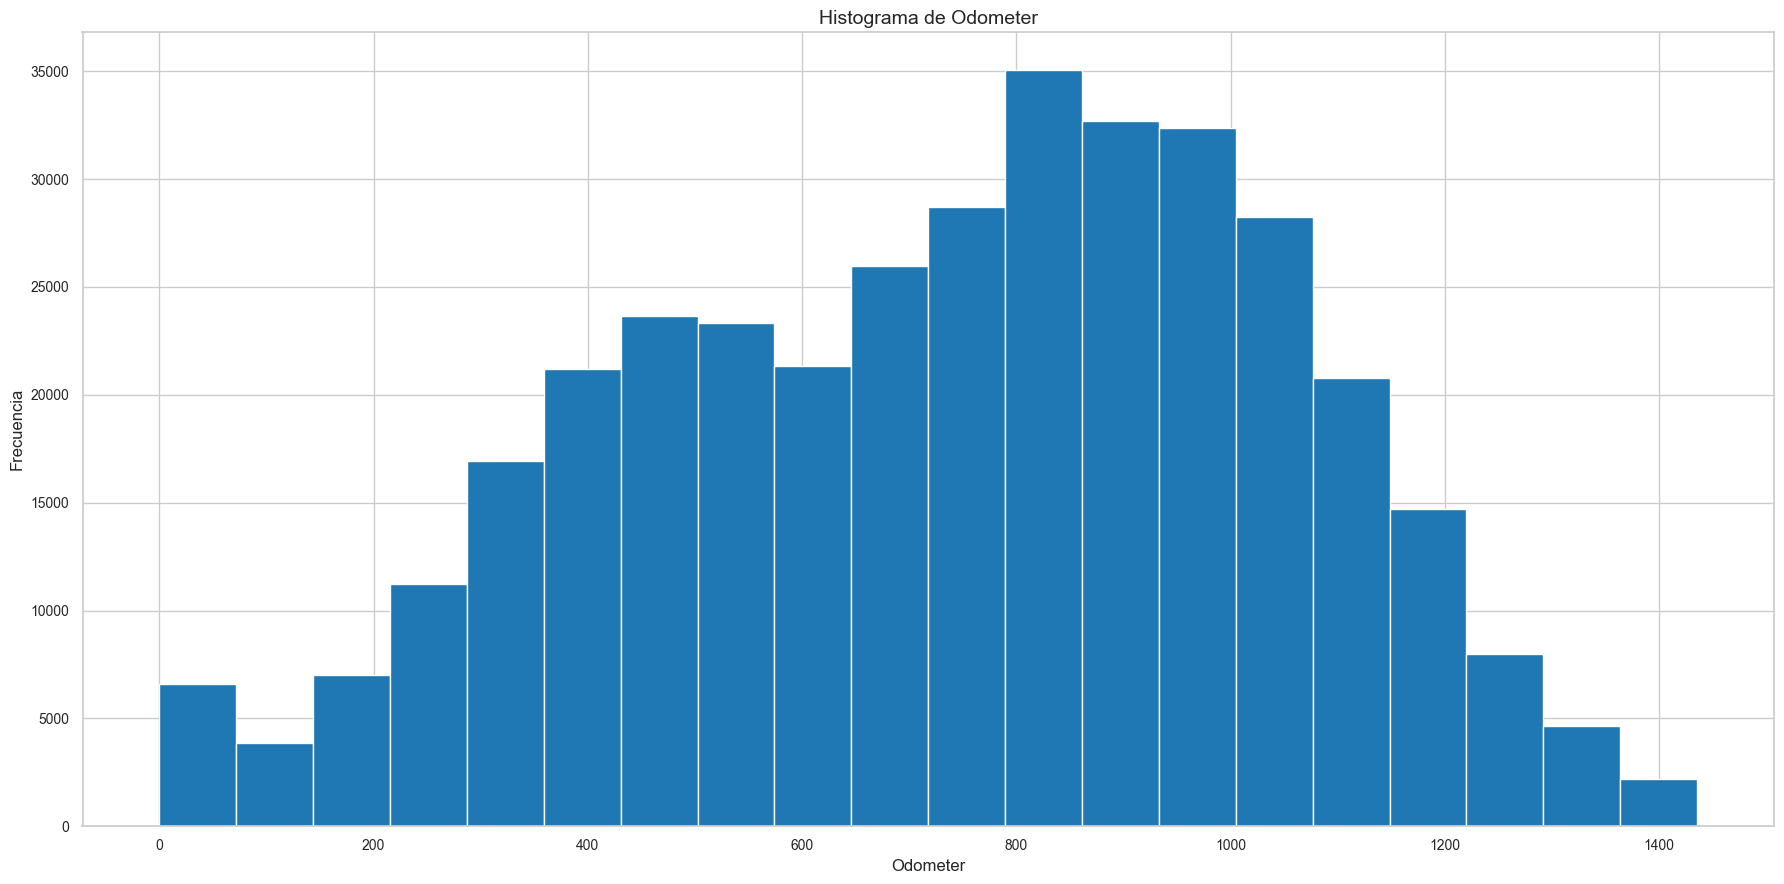

In [21]:
for col in ['price', 'age', 'odometer']:
    stats.probplot(transf_df[col], dist="norm", plot=plt)
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel(f'Cuantiles de {col.capitalize()}')
    plt.title(f'Gráfico Q-Q de {col.capitalize()}')
    plt.show()
    
    plt.hist(transf_df[col], bins=bins_sturges)
    plt.xlabel(col.capitalize())
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {col.capitalize()}')
    plt.show()

## Escalando variables numéricas

<div class="alert alert-block alert-info">

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.

</div>


In [22]:
minmax_df = transf_df.copy()
scaler = MinMaxScaler()
minmax_df[['price', 'age', 'odometer']] = scaler.fit_transform(minmax_df[['price', 'age', 'odometer']])


<div class="alert alert-block alert-info">

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

</div>

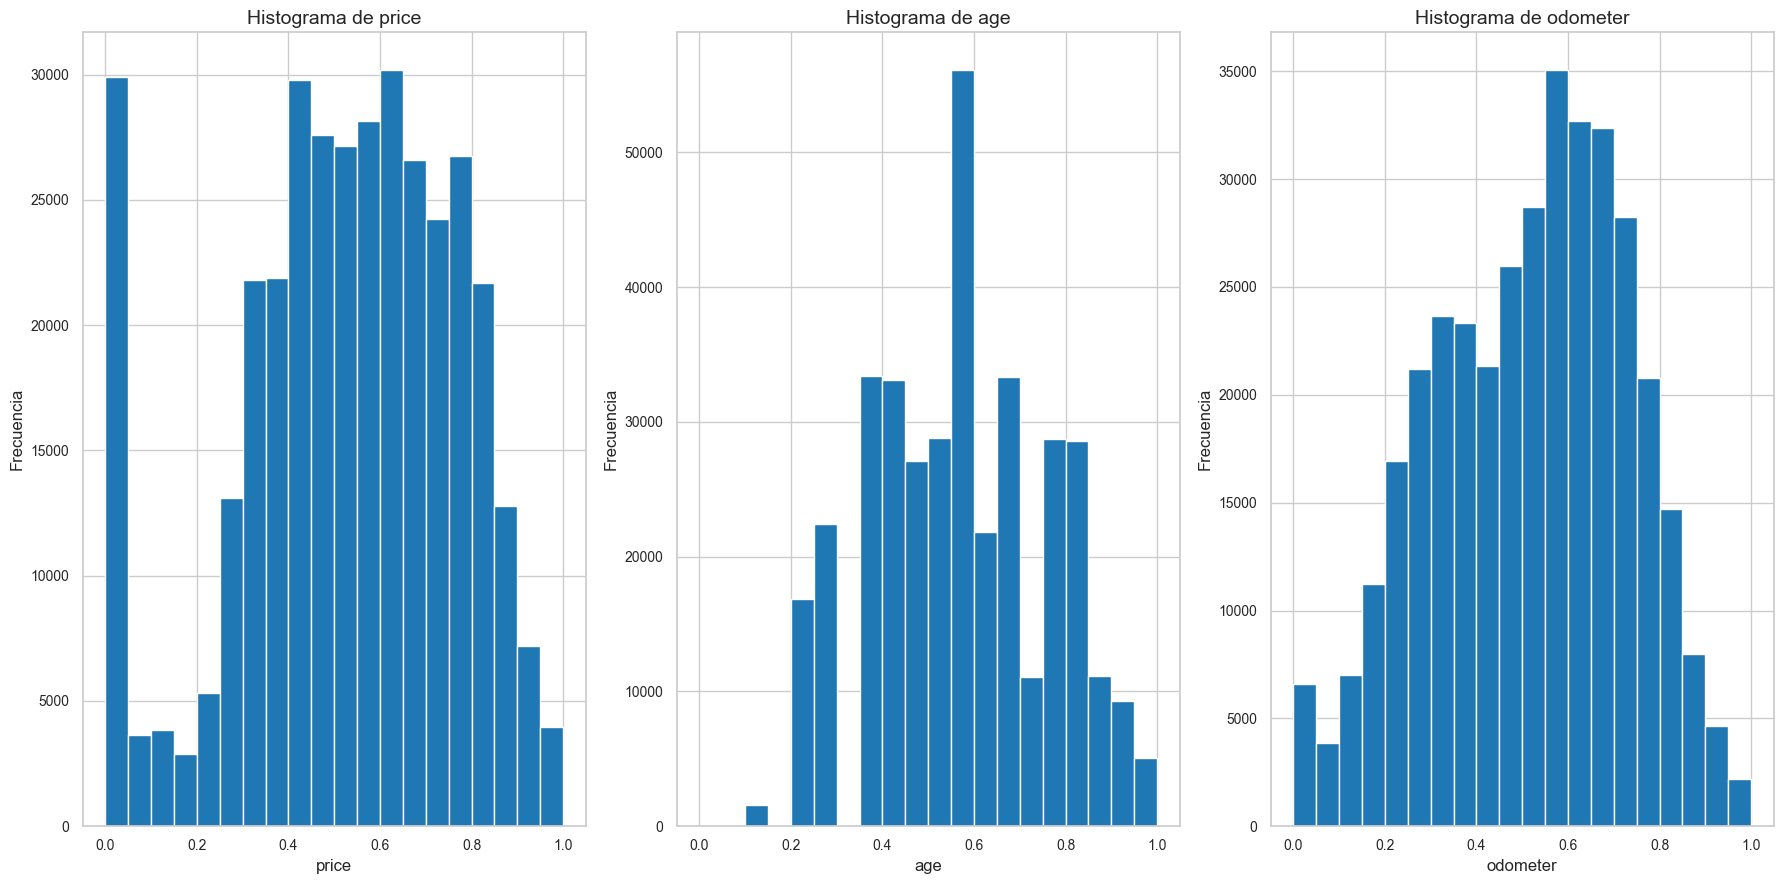

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3)

for i, col in enumerate(['price', 'age', 'odometer']):
    minmax_df[col].hist(bins=bins_sturges, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Codificando variables categóricas

<div class="alert alert-block alert-info">

7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

</div>

In [24]:
categorical_columns = cars_df.select_dtypes(include=['object']).columns
cars_df[categorical_columns].describe().T

,count,unique,top,freq
region,368433,404,columbus,3201
region_url,368433,413,https://grandrapids.craigslist.org,2745
manufacturer,368433,40,ford,62162
model,368433,19314,f-150,7477
fuel,368433,5,gas,313944
title_status,368433,6,clean,356757
transmission,368433,3,automatic,293338
type,368433,13,sedan,155206
state,368433,51,ca,42333


<div class="alert alert-block alert-info">
7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y 
baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.
</div>

In [25]:
highly_cardinal_variables = [col for col in categorical_columns if cars_df[col].nunique() > 100]
few_cardinal_variables = [col for col in categorical_columns if cars_df[col].nunique() <= 100]

print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


<div class="alert alert-block alert-info">

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)
</div>

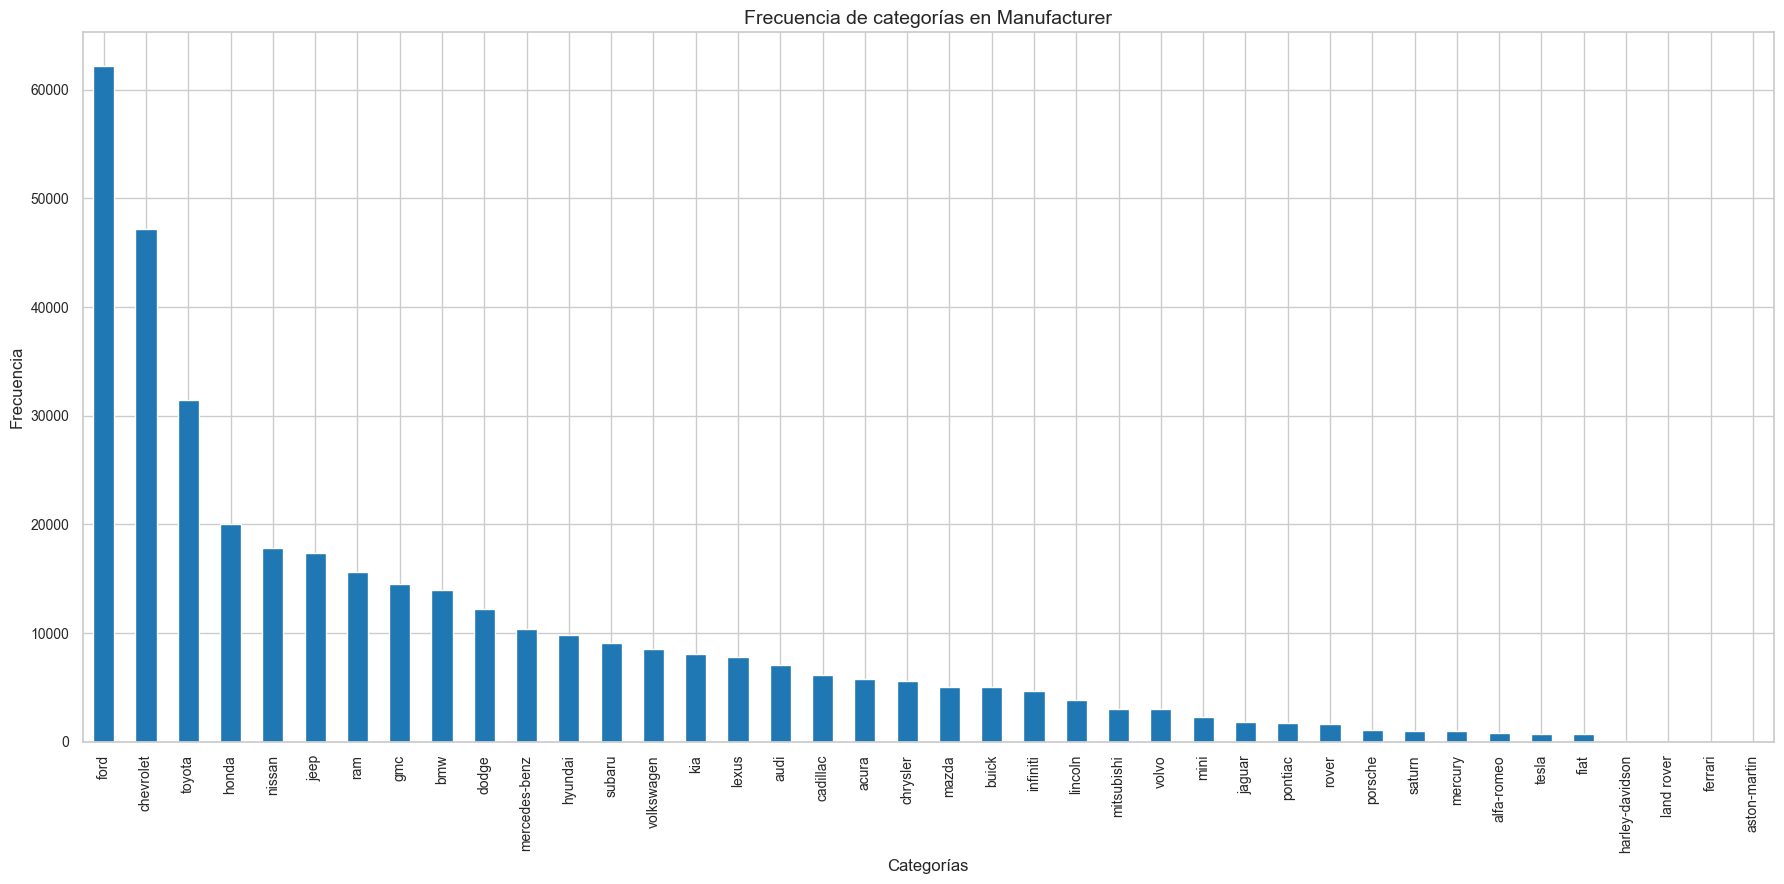

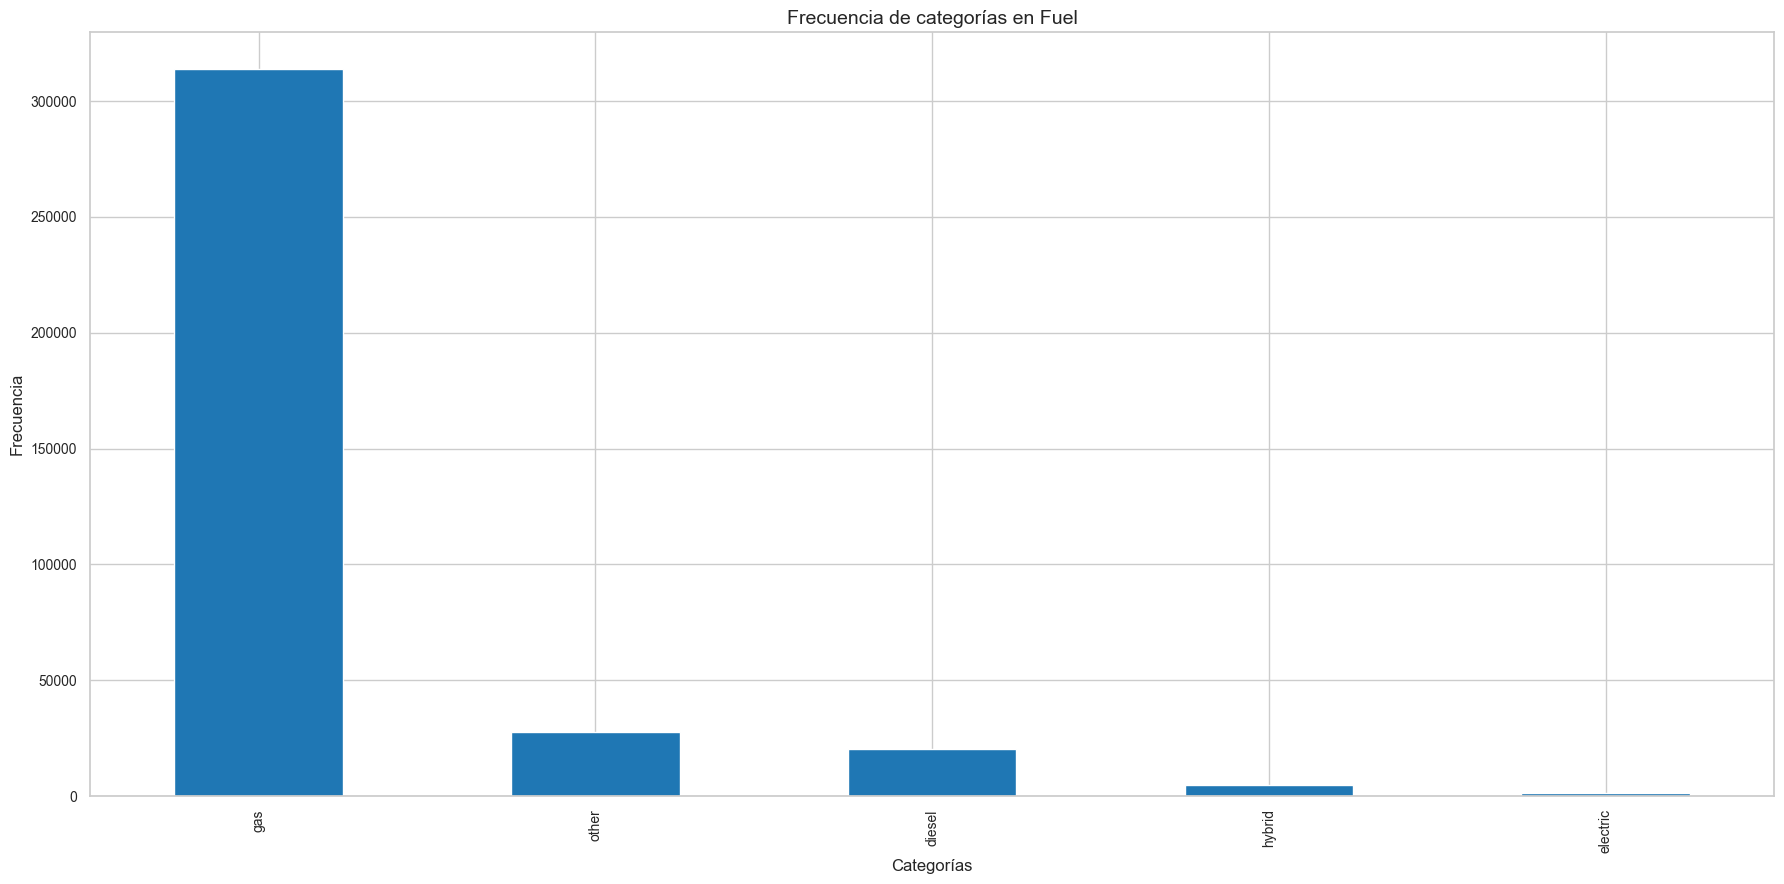

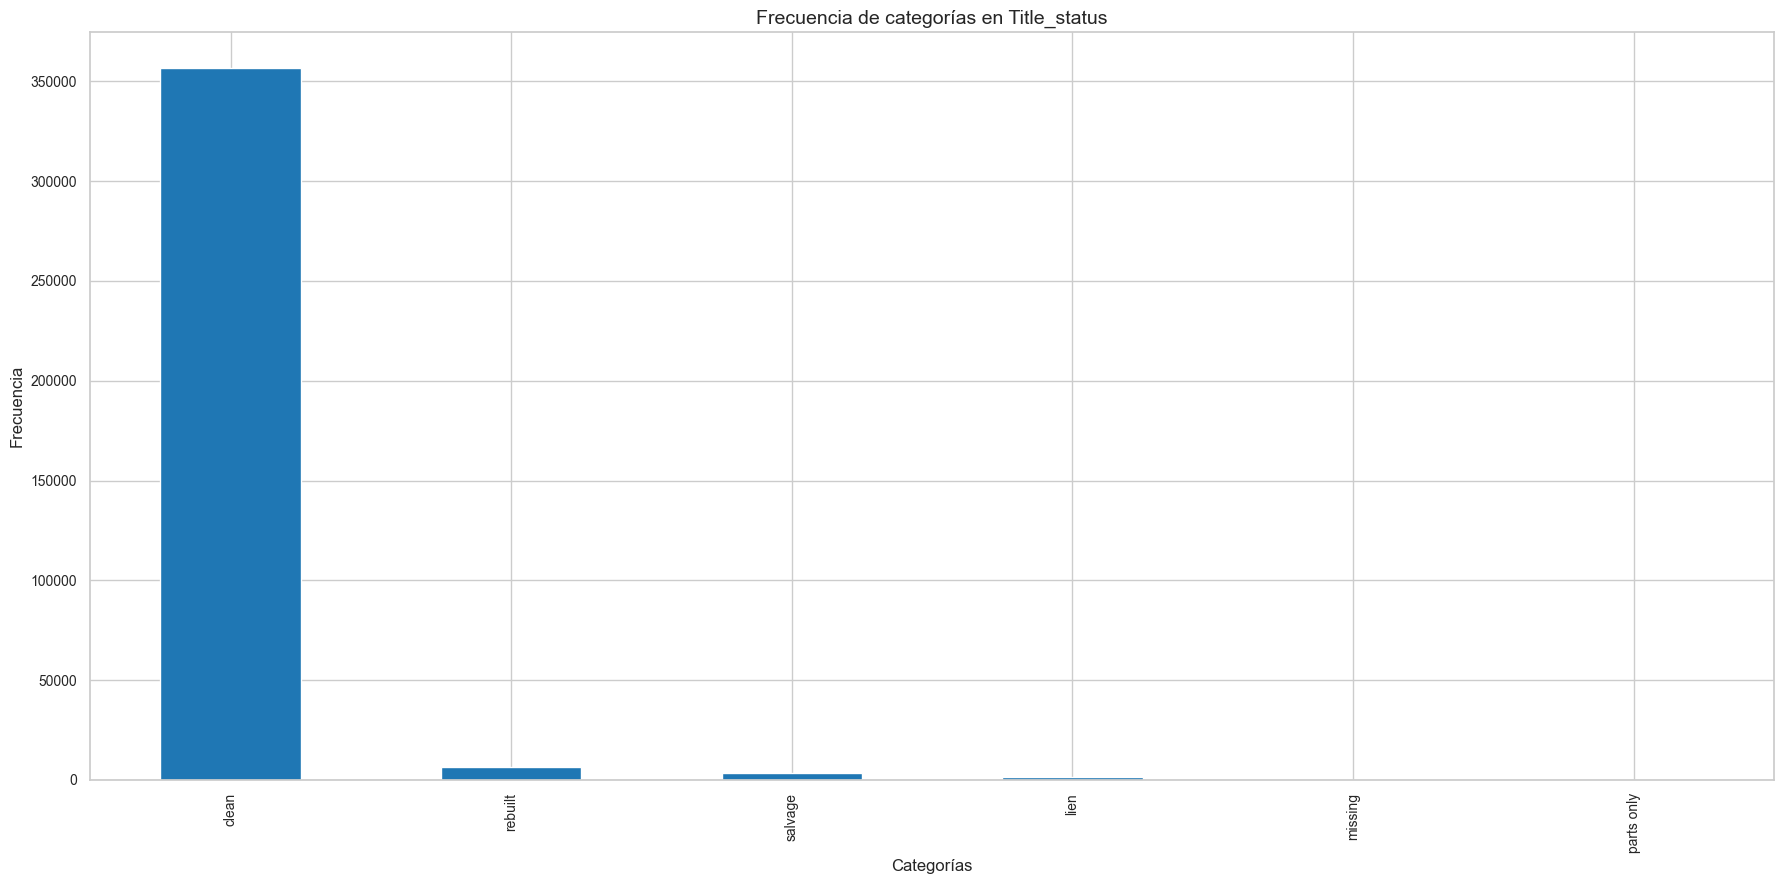

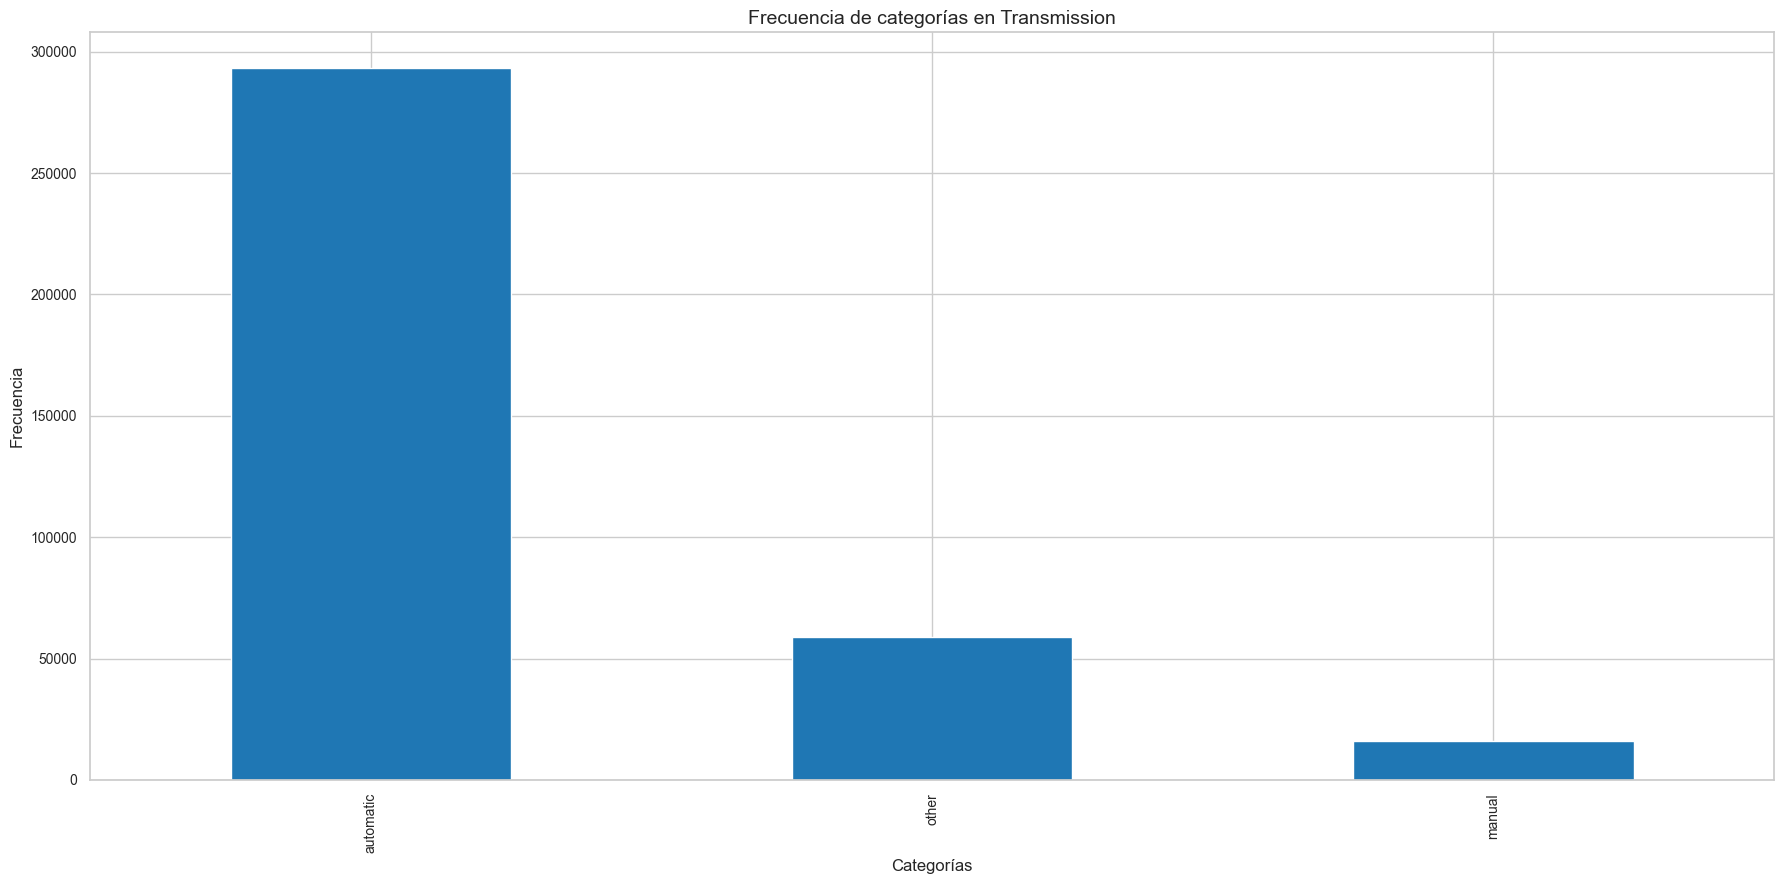

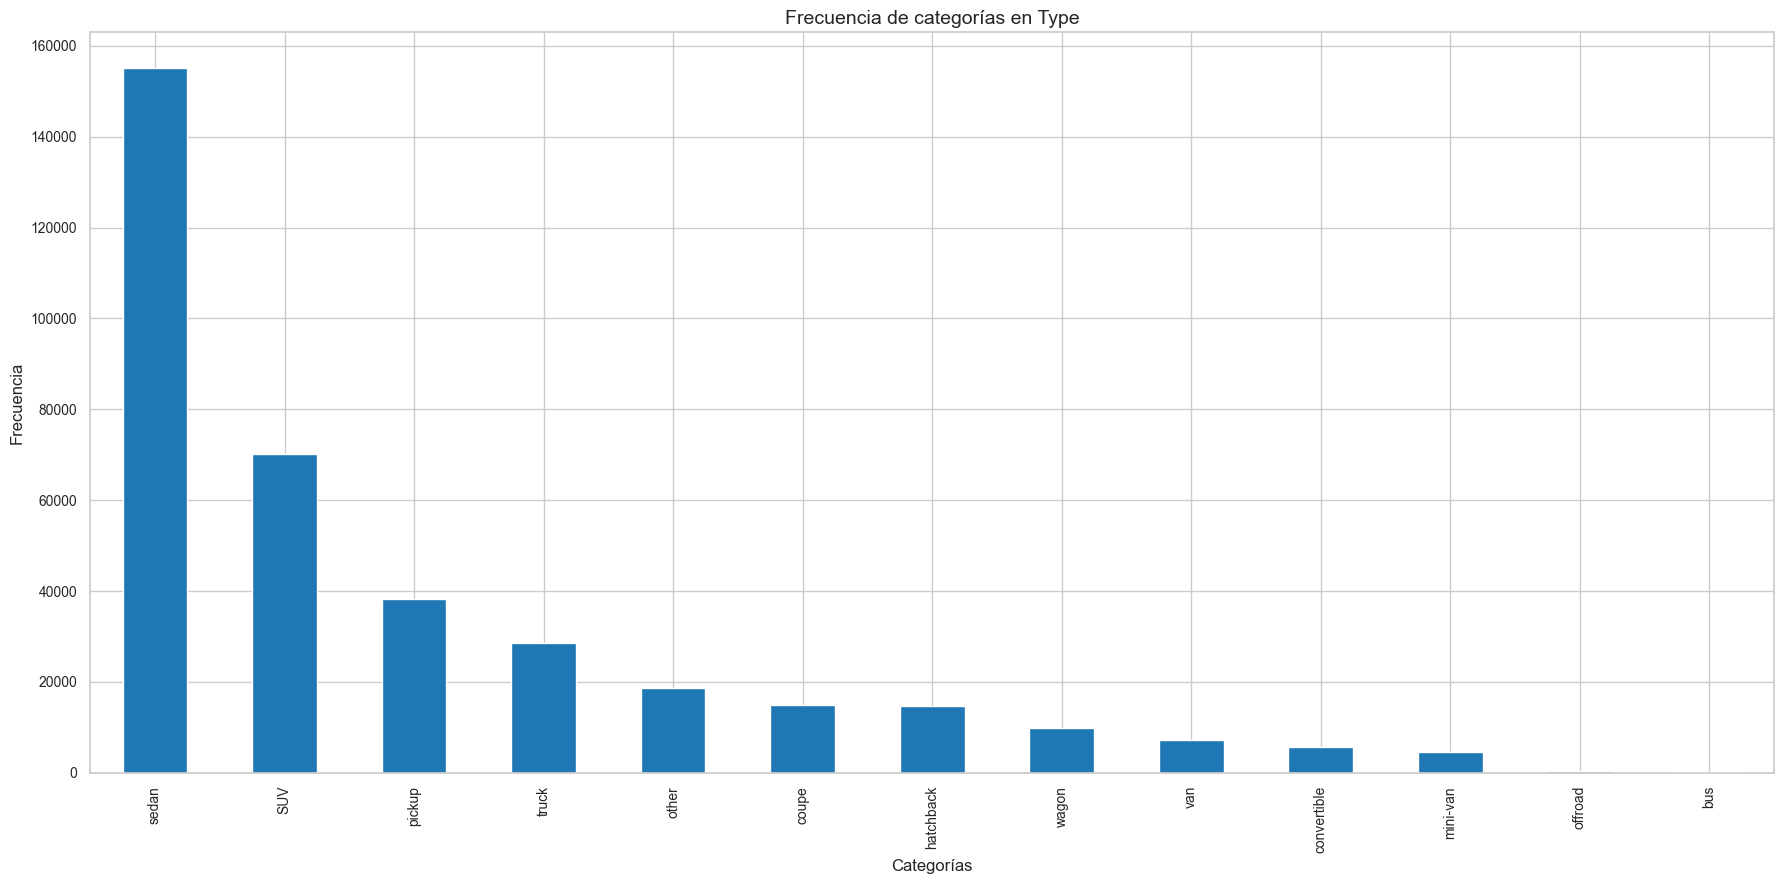

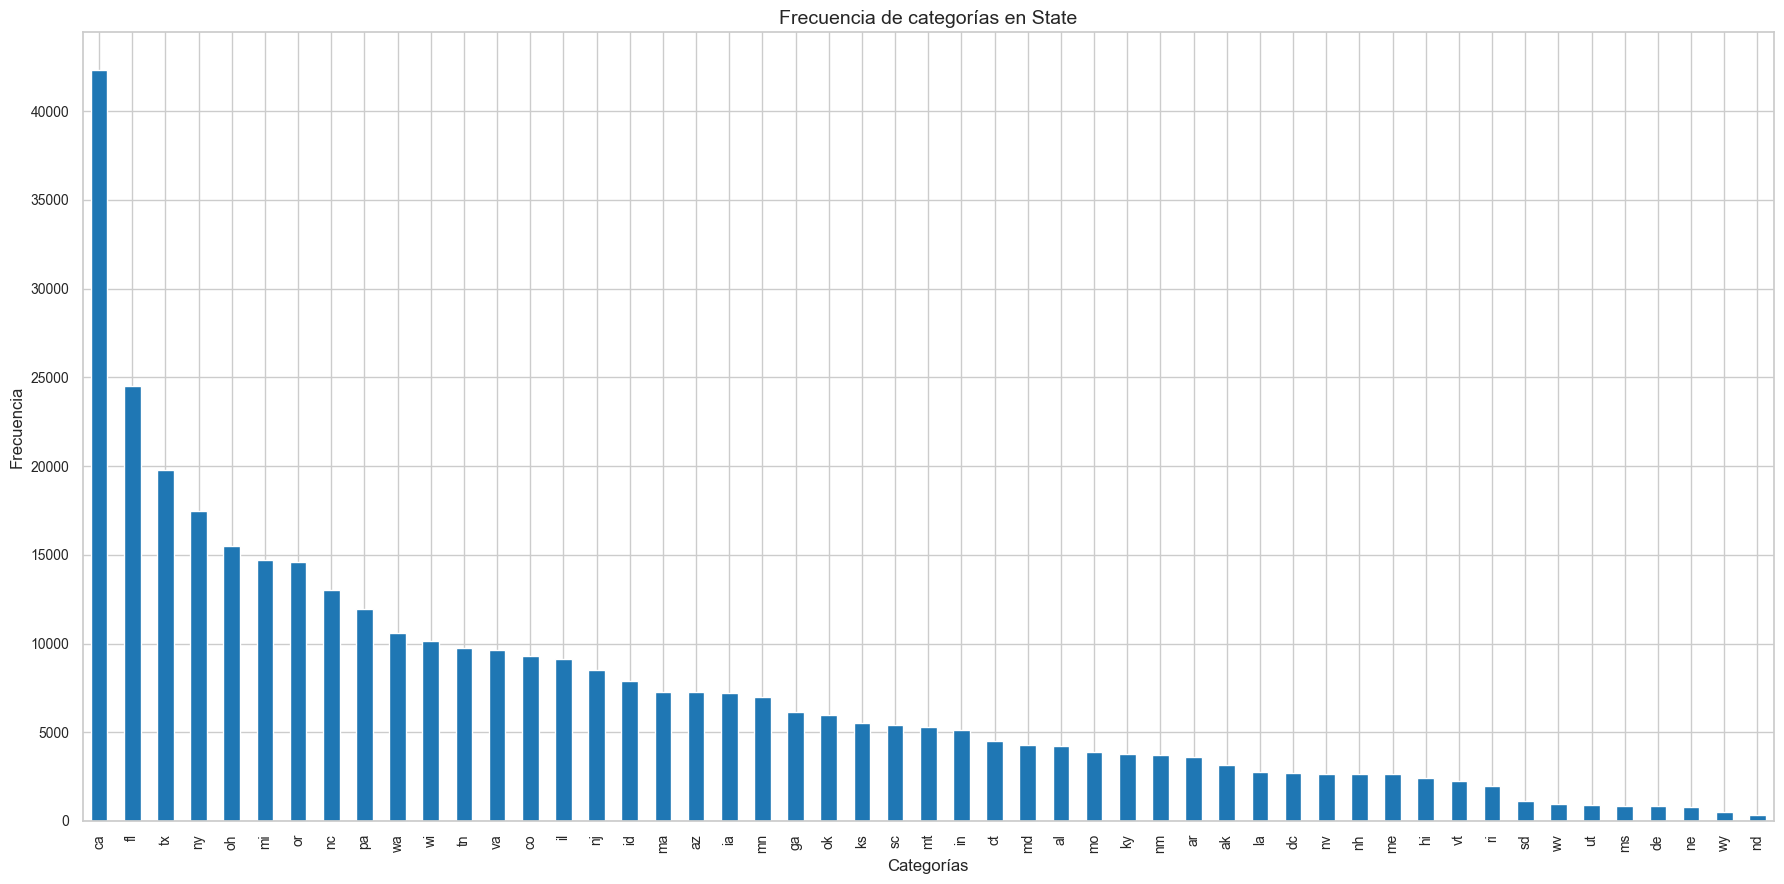

In [26]:
for col in few_cardinal_variables:
    cars_df[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de categorías en {col.capitalize()}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.show()
    

<div class="alert alert-block alert-info">

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

</div>

In [27]:
encoder = SkOneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = encoder.fit_transform(cars_df[few_cardinal_variables])
onehot_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(few_cardinal_variables))


<div class="alert alert-block alert-info">

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

</div>

In [28]:
bina = BinaryEncoder(cols=highly_cardinal_variables)
binary_df = bina.fit_transform(cars_df)
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_12,model_13,model_14,fuel,odometer,title_status,transmission,type,state,age
27,0,0,0,0,0,0,0,0,1,0,...,0,0,1,gas,57923.0,clean,other,pickup,al,11.0
28,0,0,0,0,0,0,0,0,1,0,...,0,1,0,gas,71229.0,clean,other,pickup,al,15.0
29,0,0,0,0,0,0,0,0,1,0,...,0,1,1,gas,19160.0,clean,other,pickup,al,5.0
30,0,0,0,0,0,0,0,0,1,0,...,1,0,0,gas,41124.0,clean,other,pickup,al,8.0
31,0,0,0,0,0,0,0,0,1,0,...,1,0,1,gas,128000.0,clean,automatic,truck,al,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,0,1,gas,32226.0,clean,other,sedan,wy,6.0
426876,1,1,0,0,1,0,1,0,0,1,...,1,1,1,gas,12029.0,clean,other,sedan,wy,5.0
426877,1,1,0,0,1,0,1,0,0,1,...,0,1,1,diesel,4174.0,clean,other,hatchback,wy,5.0
426878,1,1,0,0,1,0,1,0,0,1,...,0,1,1,gas,30112.0,clean,other,sedan,wy,7.0


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [29]:

minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)
final_df.head()

,price,odometer,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_12,model_13,model_14,fuel,odometer,title_status,transmission,type,state,age
0,0.794413,0.435888,0.558472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,gas,57923.0,clean,other,pickup,al,11.0
1,0.669900,0.486465,0.696155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,gas,71229.0,clean,other,pickup,al,15.0
2,0.852455,0.242097,0.212319,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,1,gas,19160.0,clean,other,pickup,al,5.0
3,0.767405,0.363384,0.417320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,gas,41124.0,clean,other,pickup,al,8.0
4,0.561575,0.663928,0.597125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,gas,128000.0,clean,automatic,truck,al,12.0
